In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
from google.colab import drive

#warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
service_df = pd.read_csv('/content/drive/MyDrive/AML_Proj/MTA_Subway_Trains_Delayed__Beginning_2020_20241202.csv')
ridership_df = pd.read_csv('/content/drive/MyDrive/AML_Proj/MTA_Subway_Customer_Journey-Focused_Metrics__Beginning_2020_20241210.csv')

In [ ]:
len(service_df['line'].unique())

23

In [ ]:
service_df.groupby('line')['delays'].sum().reset_index()

,line,delays
0,1,101645
1,2,131408
2,3,69582
3,4,105746
4,5,77524
5,6,144997
6,7,83958
7,A,159198
8,B,60961
9,C,82866


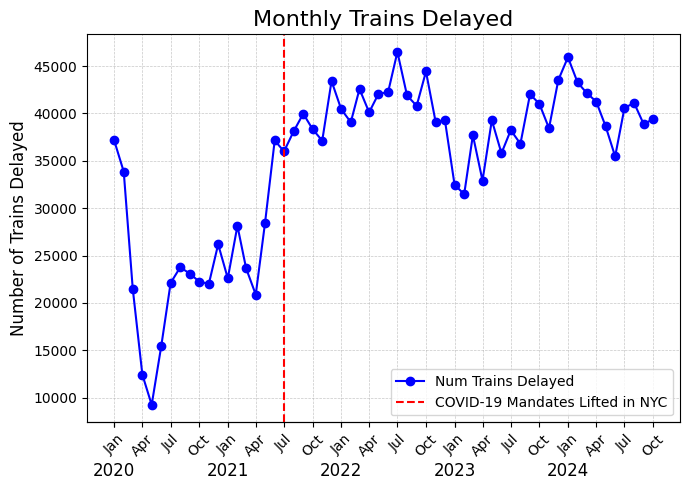

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = service_df.groupby(['month'])['delays'].sum().reset_index()
df = df[df['month'] >= '2020-01-01']
df = df[df['month'] <= '2024-10-01']
df.rename(columns={'delays': 'num_trains_delayed'}, inplace=True)
df['month'] = pd.to_datetime(df['month'])  # Convert to datetime
df['year'] = df['month'].dt.year
df['month_name'] = df['month'].dt.strftime('%b')  # Get abbreviated month names

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(df['month'], df['num_trains_delayed'], marker='o', linestyle='-', color='b', label='Num Trains Delayed')

highlight_date = pd.to_datetime('2021-07-01')
ax.axvline(x=highlight_date, color='red', linestyle='--', linewidth=1.5, label='COVID-19 Mandates Lifted in NYC')


# Customize the primary x-axis (months)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))  # Quarterly ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Quarterly months (Jan, Apr, Jul, Oct)
ax.tick_params(axis='x', labelsize=10, rotation=45)  # Rotate months

# Add a secondary x-axis for years
secax = ax.secondary_xaxis('bottom')
secax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks for years
secax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format: 2020, 2021, etc.
secax.tick_params(axis='x', labelsize=12, pad=25)  # Adjust padding and label size

# Add gridlines and labels
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Monthly Trains Delayed', fontsize=16)
plt.ylabel('Number of Trains Delayed', fontsize=12)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
service_df = service_df[service_df['day_type'] == 1] #limited to weekdays
agg_service_category = service_df.groupby(['month', 'reporting_category', 'line'])['subcategory'].count().reset_index().sort_values(by='subcategory', ascending=False).rename(columns={'subcategory': 'subcategory_count'})
print(agg_service_category.head(1))
#Check
print('[Check] Total disruptions on line 6 for Infrastructure Equipment reporting_category in 2024/04/01: ', len(service_df[(service_df['reporting_category'] == 'Infrastructure & Equipment') & (service_df['month'] == '2024-04-01') & (service_df['line']=='6')]))
service_df[(service_df['reporting_category'] == 'Infrastructure & Equipment') & (service_df['month'] == '2024-04-01') & (service_df['line']=='6')]

           month          reporting_category line  subcategory_count
6552  2024-04-01  Infrastructure & Equipment    6                 12
[Check] Total disruptions on line 6 for Infrastructure Equipment reporting_category in 2024/04/01:  12


,month,division,line,day_type,reporting_category,subcategory,delays
4371,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Braking,24
4372,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Door-Related,113
4373,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,"Fire, Smoke, Debris",2
4374,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Other - CE,42
4375,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Other Infrastructure,8
4376,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Other Internal Disruptions,1
4377,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Other - Sig,151
4378,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Propulsion,10
4379,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Rail and Roadbed,73
4380,2024-04-01,A DIVISION,6,1,Infrastructure & Equipment,Service Delivery,74


In [ ]:
ridership_df.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-10-01,A DIVISION,1,offpeak,5064189.5,0.957766,0.795922,4850309.5,4030698.2,590188.80,0.116542,0.883458
1,2024-10-01,A DIVISION,1,peak,5667333.0,1.003055,0.663860,5684646.5,3762317.2,552005.00,0.097401,0.902599
2,2024-10-01,A DIVISION,2,offpeak,3160132.5,1.249075,0.543303,3947243.2,1716908.9,511390.62,0.161826,0.838174
3,2024-10-01,A DIVISION,2,peak,3801006.5,1.084550,0.401120,4122383.2,1524660.4,470566.16,0.123800,0.876200
4,2024-10-01,A DIVISION,3,offpeak,2375433.8,0.915680,0.380471,2175138.0,903784.2,280620.84,0.118135,0.881865


In [ ]:
service_df = service_df[['month', 'line', 'reporting_category', 'delays']].groupby(['month', 'line', 'reporting_category'])['delays'].sum().reset_index()
service_df = pd.merge(service_df, agg_service_category, on=['month', 'line', 'reporting_category'], how='left')
service_df = service_df.rename(columns={'delays': 'num_trains_delayed', 'subcategory_count': 'disruption_subcategory_count'})

ridership_df = ridership_df[ridership_df['period'] == 'peak'] #limited to peak hours
ridership_df = ridership_df.drop(columns=['period', 'division'])
ridership_df = ridership_df.rename(columns={'num_passengers': 'ridership'})
ridership_df['additional_journey_time'] = ridership_df['additional platform time'] + ridership_df['additional train time']

combined_df = pd.merge(service_df, ridership_df, on=['month', 'line'], how='left')
combined_df['month'] = pd.to_datetime(combined_df['month'])
combined_df['month_yr'] = combined_df['month'].dt.to_period('M')
combined_df = combined_df[combined_df['month'] >= '2021-07-01']
combined_df = combined_df[combined_df['month'] <= '2024-10-01']
combined_df = combined_df[['month', 'month_yr', 'line', 'reporting_category', 'disruption_subcategory_count', 'num_trains_delayed', 'ridership', 'additional_journey_time']]
print(combined_df.shape)
combined_df.sort_values(by='month', ascending=False).head()

(5152, 8)


,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,ridership,additional_journey_time
7396,2024-10-01,2024-10,S Rock,Police & Medical,1,25,24367.299,-0.350581
7313,2024-10-01,2024-10,B,Crew Availability,1,156,2994879.200,2.675653
7298,2024-10-01,2024-10,6,Operating Conditions,2,479,6373271.500,2.093478
7299,2024-10-01,2024-10,6,Planned ROW Work,4,378,6373271.500,2.093478
7300,2024-10-01,2024-10,6,Police & Medical,3,833,6373271.500,2.093478


In [ ]:
combined_df.head()

,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,ridership,additional_journey_time
2245,2021-07-01,2021-07,1,Crew Availability,1,765,2240734.2,1.457453
2246,2021-07-01,2021-07,1,External Factors,2,23,2240734.2,1.457453
2247,2021-07-01,2021-07,1,Infrastructure & Equipment,11,441,2240734.2,1.457453
2248,2021-07-01,2021-07,1,Operating Conditions,0,68,2240734.2,1.457453
2249,2021-07-01,2021-07,1,Planned ROW Work,2,99,2240734.2,1.457453


## Merging with Weather Statistics

### Data source: Climate Data Online from National Oceanic and Atmospheric Administration
### Dataset: [Global Summary of the Month](https://www.ncei.noaa.gov/cdo-web/search)

**Variables:**

**Weather impact on disruptions:**
1. TAVG: Average temperature for general climate impact.
2. PRCP: Total precipitation, directly linked to potential flooding.
3. SNOW: Total snowfall, important for winter disruptions.
4. DSND: Number of days with significant snow depth.
5. TMAX: Monthly maximum temperature for heat-related stress.
6. TMIN: Monthly minimum temperature for cold-related risks.
7. DX90: Number of very hot days (≥ 90°F), which can stress infrastructure.
8. DT32: Number of very cold days (≤ 32°F), which can lead to freezing-related disruptions.

**Key Daily Extremes:**
1. EMXP: Maximum daily precipitation in the month, a proxy for extreme rain events.
2. EMSN: Maximum daily snowfall, useful for peak snow disruptions.

In [ ]:
weather_path = '/content/drive/MyDrive/AML_Proj/nyc_weather_2020_2022.csv'
weather_path2 = '/content/drive/MyDrive/AML_Proj/nyc_weather_2022-2024.csv'
weather_df = pd.concat([pd.read_csv(weather_path), pd.read_csv(weather_path2)], axis = 0)

weather_df_preprocessed = weather_df[['STATION', 'DATE', 'PRCP', 'SNOW', 'DSND', 'TAVG', 'TMAX', 'TMIN', 'EMXP', 'EMSN', 'DX90', 'DT32']]
weather_df_preprocessed['month_yr'] = pd.to_datetime(weather_df_preprocessed['DATE']).dt.to_period('M')
weather_df_preprocessed = weather_df_preprocessed.dropna()
weather_df_preprocessed

# Aggregate data by 'month_year'
aggregated_weather = weather_df_preprocessed.groupby('month_yr').agg({
    'PRCP': 'sum',   # Total precipitation
    'SNOW': 'sum',   # Total snowfall
    'DSND': 'sum',   # Total snow depth
    'TAVG': 'mean',  # Average temperature
    'TMAX': 'mean',  # Average max temperature
    'TMIN': 'mean',  # Average min temperature
    #'EMXP': 'max',   # Maximum daily precipitation
    #'EMSN': 'max',   # Maximum daily snowfall
    'DX90': 'mean',   # Total number of very hot days (≥ 90°F)
    'DT32': 'mean',   # Total number of very cold days (≤ 32°F)
}).reset_index()

merge_df = pd.merge(combined_df, aggregated_weather, on='month_yr', how='left')
merge_df.head()


merge_df['season'] = merge_df['month'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                              'Spring' if x in [3, 4, 5] else
                                              'Summer' if x in [6, 7, 8] else
                                              'Fall')

merge_df['extreme_hot_day_ind'] = (merge_df['DX90'] > 0).astype(int)
merge_df['extreme_cold_day_ind'] = (merge_df['DT32'] > 0).astype(int)
merge_df['snow_day_ind'] = (merge_df['SNOW'] > 0).astype(int)
merge_df.head()

<ipython-input-236-c4dfc4419196>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_preprocessed['month_yr'] = pd.to_datetime(weather_df_preprocessed['DATE']).dt.to_period('M')


,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,ridership,additional_journey_time,PRCP,SNOW,DSND,TAVG,TMAX,TMIN,DX90,DT32,season,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind
0,2021-07-01,2021-07,1,Crew Availability,1,765,2240734.2,1.457453,76.38,0.0,0.0,76.2,84.455556,67.977778,6.444444,0.0,Summer,1,0,0
1,2021-07-01,2021-07,1,External Factors,2,23,2240734.2,1.457453,76.38,0.0,0.0,76.2,84.455556,67.977778,6.444444,0.0,Summer,1,0,0
2,2021-07-01,2021-07,1,Infrastructure & Equipment,11,441,2240734.2,1.457453,76.38,0.0,0.0,76.2,84.455556,67.977778,6.444444,0.0,Summer,1,0,0
3,2021-07-01,2021-07,1,Operating Conditions,0,68,2240734.2,1.457453,76.38,0.0,0.0,76.2,84.455556,67.977778,6.444444,0.0,Summer,1,0,0
4,2021-07-01,2021-07,1,Planned ROW Work,2,99,2240734.2,1.457453,76.38,0.0,0.0,76.2,84.455556,67.977778,6.444444,0.0,Summer,1,0,0


In [ ]:
merge_df = merge_df[['month', 'month_yr', 'line', 'reporting_category',
       'disruption_subcategory_count', 'num_trains_delayed', 'ridership',
       'season','PRCP', 'SNOW','TAVG', 'TMAX', 'TMIN', 'extreme_hot_day_ind', 'extreme_cold_day_ind','snow_day_ind', 'additional_journey_time']]

## Subway Stops and Boroughs Serviced per Line

### Data Source: NYC Open Data Portal
### Dataset: [MTA Subway Entrances and Exits: 2024](https://data.ny.gov/Transportation/MTA-Subway-Entrances-and-Exits-2024/i9wp-a4ja/about_data)

**Variables:**

Num stops that each line services during weekdays (num_stations)

In [ ]:
subway_stops = pd.read_csv('/content/drive/MyDrive/AML_Proj/MTA_Subway_Entrances_and_Exits__2024_20241210.csv')
subway_stops = subway_stops[subway_stops['Entrance Type'] == 'Stair']

exploded_routes = subway_stops.assign(Daytime_Route=subway_stops['Daytime Routes'].str.split()).explode('Daytime_Route')
unique_stations_per_line = exploded_routes[['Daytime_Route', 'Constituent Station Name']].drop_duplicates()

num_stations_per_line = unique_stations_per_line.groupby('Daytime_Route')['Constituent Station Name'].nunique().reset_index()
num_stations_per_line.columns = ['line', 'num_stations']

unique_agg_borough = (
    exploded_routes.groupby('Daytime_Route')['Borough']
    .apply(lambda x: list(set(x)))
    .reset_index()
)
exploded_df = unique_agg_borough.explode('Borough')
boroughs_df = pd.crosstab(exploded_df['Daytime_Route'], exploded_df['Borough']).reset_index()
boroughs_df.columns = ['line', 'Bronx_Ind', 'Brooklyn_Ind', 'Manhattan_Ind', 'Queens_Ind', 'Staten_Ind']

merge_df = pd.merge(merge_df,
                    num_stations_per_line,
                    on='line',
                    how='left'
)

merge_df = pd.merge(merge_df,
                    boroughs_df,
                    on='line',
                    how='left')

merge_df.head()

,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,ridership,season,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,additional_journey_time,num_stations,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind
0,2021-07-01,2021-07,1,Crew Availability,1,765,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0
1,2021-07-01,2021-07,1,External Factors,2,23,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0
2,2021-07-01,2021-07,1,Infrastructure & Equipment,11,441,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0
3,2021-07-01,2021-07,1,Operating Conditions,0,68,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0
4,2021-07-01,2021-07,1,Planned ROW Work,2,99,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0


# Model 1: Disruption Exposure Prediction

In [ ]:
preprocessing_df = merge_df.copy()
preprocessing_df['date'] = preprocessing_df['month']
preprocessing_df['month'] = preprocessing_df['month'].dt.month

service_agg = preprocessing_df.groupby(['date', 'month_yr', 'reporting_category'])['num_trains_delayed'].sum().reset_index()
service_agg = service_agg.rename(columns={'num_trains_delayed': 'monthly_train_delays'})
preprocessing_df = pd.merge(preprocessing_df, service_agg, on=['date', 'month_yr', 'reporting_category'], how='left')
preprocessing_df['disruption_type_ratio'] = preprocessing_df['num_trains_delayed'] / preprocessing_df['monthly_train_delays']
preprocessing_df.head()

,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,ridership,season,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,additional_journey_time,num_stations,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind,date,monthly_train_delays,disruption_type_ratio
0,7,2021-07,1,Crew Availability,1,765,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0,2021-07-01,10233,0.074758
1,7,2021-07,1,External Factors,2,23,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0,2021-07-01,577,0.039861
2,7,2021-07,1,Infrastructure & Equipment,11,441,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0,2021-07-01,8860,0.049774
3,7,2021-07,1,Operating Conditions,0,68,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0,2021-07-01,2414,0.028169
4,7,2021-07,1,Planned ROW Work,2,99,2240734.2,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,1.457453,39.0,0.0,1.0,1.0,0.0,0.0,2021-07-01,3805,0.026018


In [ ]:
model1_df = preprocessing_df[['date', 'month', 'month_yr', 'line', 'reporting_category', 'disruption_subcategory_count','num_trains_delayed','monthly_train_delays', 'disruption_type_ratio',
                              'ridership', 'num_stations',
                              'season', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'extreme_hot_day_ind', 'extreme_cold_day_ind', 'snow_day_ind']]

model1_original = model1_df.copy()
model1_df.head()

,date,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,monthly_train_delays,disruption_type_ratio,ridership,num_stations,season,PRCP,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind
0,2021-07-01,7,2021-07,1,Crew Availability,1,765,10233,0.074758,2240734.2,39.0,Summer,76.38,76.2,84.455556,67.977778,1,0,0
1,2021-07-01,7,2021-07,1,External Factors,2,23,577,0.039861,2240734.2,39.0,Summer,76.38,76.2,84.455556,67.977778,1,0,0
2,2021-07-01,7,2021-07,1,Infrastructure & Equipment,11,441,8860,0.049774,2240734.2,39.0,Summer,76.38,76.2,84.455556,67.977778,1,0,0
3,2021-07-01,7,2021-07,1,Operating Conditions,0,68,2414,0.028169,2240734.2,39.0,Summer,76.38,76.2,84.455556,67.977778,1,0,0
4,2021-07-01,7,2021-07,1,Planned ROW Work,2,99,3805,0.026018,2240734.2,39.0,Summer,76.38,76.2,84.455556,67.977778,1,0,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_to_normalize = ['ridership', 'num_stations','disruption_subcategory_count', 'num_trains_delayed', 'PRCP', 'TAVG', 'TMAX', 'TMIN']

# Standardization (z-score normalization, mean=0, std=1)
standard_scaler = StandardScaler()
model1_df[features_to_normalize] = standard_scaler.fit_transform(model1_df[features_to_normalize])
model1_df.head()

<ipython-input-241-a7046dd2add8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1_df[features_to_normalize] = standard_scaler.fit_transform(model1_df[features_to_normalize])


,date,month,month_yr,line,reporting_category,disruption_subcategory_count,num_trains_delayed,monthly_train_delays,disruption_type_ratio,ridership,num_stations,season,PRCP,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind
0,2021-07-01,7,2021-07,1,Crew Availability,-0.611375,2.417944,10233,0.074758,-0.426232,0.338283,Summer,1.524507,1.246234,1.228733,1.262124,1,0,0
1,2021-07-01,7,2021-07,1,External Factors,-0.310649,-1.001711,577,0.039861,-0.426232,0.338283,Summer,1.524507,1.246234,1.228733,1.262124,1,0,0
2,2021-07-01,7,2021-07,1,Infrastructure & Equipment,2.395885,0.924725,8860,0.049774,-0.426232,0.338283,Summer,1.524507,1.246234,1.228733,1.262124,1,0,0
3,2021-07-01,7,2021-07,1,Operating Conditions,-0.912101,-0.794320,2414,0.028169,-0.426232,0.338283,Summer,1.524507,1.246234,1.228733,1.262124,1,0,0
4,2021-07-01,7,2021-07,1,Planned ROW Work,-0.310649,-0.651450,3805,0.026018,-0.426232,0.338283,Summer,1.524507,1.246234,1.228733,1.262124,1,0,0


In [ ]:
model1_df = model1_df.copy()
model1_df['date'] = pd.to_datetime(model1_df['date'])
model1_df['month_yr'] = model1_df['month_yr'].dt.to_timestamp()
model1_df['previous_month_yr'] = model1_df['month_yr'] - pd.offsets.MonthBegin(1)

model1_df = pd.merge(model1_df, model1_df[['line', 'month_yr', 'reporting_category', 'num_trains_delayed', 'disruption_type_ratio', 'ridership']],
                     left_on=['line','reporting_category', 'previous_month_yr'],
                     right_on=['line', 'reporting_category', 'month_yr'],
                     how='left')

model1_df['prev_month_num_trains_delayed'] = model1_df['num_trains_delayed_y'].fillna(0)
model1_df['prev_month_disruption_type_ratio'] = model1_df['disruption_type_ratio_y'].fillna(0)
model1_df['prev_month_ridership'] = model1_df['ridership_y'].fillna(0)
#model1_df['prev_month_disruption_subcategory_count'] = model1_df['disruption_subcategory_count_y'].fillna(0)

model1_df = model1_df.drop(columns={'previous_month_yr', 'month_yr_y', 'num_trains_delayed_y', 'disruption_type_ratio_y', 'ridership_y'})
model1_df.rename(columns={'month_yr_x': 'month_yr', 'num_trains_delayed_x':'num_trains_delayed', 'disruption_type_ratio_x': 'disruption_type_ratio', 'ridership_x': 'ridership'}, inplace=True)

#Check
model1_df[(model1_df['reporting_category'] == 'Infrastructure & Equipment') & (model1_df['line'] == '1')].sort_values(by=['month_yr'], ascending=True)[['date', 'month_yr', 'line', 'reporting_category',
                                                                                                                                                        'num_trains_delayed', 'disruption_type_ratio', 'ridership',
                                                                                                                                                        'prev_month_num_trains_delayed', 'prev_month_disruption_type_ratio', 'prev_month_ridership']].head()

,date,month_yr,line,reporting_category,num_trains_delayed,disruption_type_ratio,ridership,prev_month_num_trains_delayed,prev_month_disruption_type_ratio,prev_month_ridership
2,2021-07-01,2021-07-01,1,Infrastructure & Equipment,0.924725,0.049774,-0.426232,0.000000,0.000000,0.000000
131,2021-08-01,2021-08-01,1,Infrastructure & Equipment,-0.531624,0.017653,-0.129171,0.924725,0.049774,-0.426232
260,2021-09-01,2021-09-01,1,Infrastructure & Equipment,0.007594,0.027295,-0.374760,-0.531624,0.017653,-0.129171
391,2021-10-01,2021-10-01,1,Infrastructure & Equipment,0.459246,0.054786,0.388635,0.007594,0.027295,-0.374760
519,2021-11-01,2021-11-01,1,Infrastructure & Equipment,-0.038493,0.032983,0.774447,0.459246,0.054786,0.388635


In [ ]:
model1_df = model1_df.dropna()
model1_df_ohe = pd.get_dummies(model1_df, columns=['line', 'season'], drop_first=True)
model1_df_ohe.head()


model1_original = model1_original.dropna()
model1_original = pd.get_dummies(model1_original, columns=['line', 'season'], drop_first=True)

In [ ]:
model1_original.shape[0] == model1_df_ohe.shape[0]

True

In [ ]:
model1_X = model1_df_ohe.drop(columns=['reporting_category', 'date', 'month_yr', 'monthly_train_delays'])
model1_X.describe().T

,count,mean,std,min,25%,50%,75%,max
month,4455.0,6.696521e+00,3.363133,1.000000,4.000000,7.000000,10.000000,12.000000
disruption_subcategory_count,4455.0,4.974965e-02,1.038921,-0.912101,-0.611375,-0.310649,-0.009923,2.696611
num_trains_delayed,4455.0,1.288176e-01,1.001689,-1.103103,-0.669885,-0.056928,0.687377,5.326033
disruption_type_ratio,4455.0,5.107166e-02,0.035774,0.000341,0.028436,0.045973,0.065357,0.443425
ridership,4455.0,2.221952e-01,0.827269,-1.705909,-0.370960,0.126493,0.781757,2.655149
num_stations,4455.0,2.125248e-16,1.000112,-1.800204,-1.022573,0.143875,0.824303,1.504730
PRCP,4455.0,5.667799e-04,1.000876,-1.729428,-0.711852,-0.206482,0.489844,2.924849
TAVG,4455.0,7.678303e-04,0.999381,-1.883138,-0.986867,0.144003,0.829983,1.442038
TMAX,4455.0,8.222101e-04,0.999259,-1.878970,-0.988301,0.160170,0.816119,1.452705
TMIN,4455.0,7.077543e-04,0.999501,-1.882219,-0.917656,0.035384,0.842035,1.444969


## Model 1 Naive Method

In [ ]:
from sklearn.metrics import f1_score, log_loss, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model1_X = model1_df_ohe.drop(columns=['reporting_category', 'date', 'month_yr', 'monthly_train_delays'])
model1_y = model1_df_ohe['reporting_category']

X_train, X_test, y_train, y_test = train_test_split(model1_X, model1_y, test_size=0.2, random_state=42)

logistic_model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logistic_model1.fit(X_train, y_train)

y_test_pred = logistic_model1.predict(X_test)
y_train_pred = logistic_model1.predict(X_train)
y_test_proba = logistic_model1.predict_proba(X_test)
y_train_proba = logistic_model1.predict_proba(X_train)

test_f1_score = f1_score(y_test, y_test_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')
print("Test F1-Score:", test_f1_score)
print("Train F1-Score:", train_f1_score)

print("Train Log-Loss:", log_loss(y_train, y_train_proba))
print("Test Log-Loss:", log_loss(y_test, y_test_proba))

print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test F1-Score: 0.8029883397000902
Train F1-Score: 0.8288804852809112
Train Log-Loss: 0.4283680434246782
Test Log-Loss: 0.41749818656785936
Classification Report (Test):
                             precision    recall  f1-score   support

         Crew Availability       0.91      0.96      0.94       156
          External Factors       0.87      0.94      0.91       138
Infrastructure & Equipment       1.00      1.00      1.00       178
      Operating Conditions       1.00      0.93      0.97       136
          Planned ROW Work       0.46      0.51      0.49       138
          Police & Medical       0.57      0.48      0.52       145

                  accuracy                           0.81       891
                 macro avg       0.80      0.80      0.80       891
              weighted avg       0.81      0.81      0.81       891

Classification Report (Train):
                             precision    recall  f1-score   support

         Crew Availability       0.91      0.9

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the XGBoost classifier
xgb_model1 = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model1.fit(X_train, y_train_encoded)

y_pred_test_encoded = xgb_model1.predict(X_test)
y_proba_test = xgb_model1.predict_proba(X_test)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_encoded)


y_pred_train_encoded = xgb_model1.predict(X_train)
y_proba_train = xgb_model1.predict_proba(X_train)
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train_encoded)


test_f1_score = f1_score(y_test, y_pred_test_labels, average='macro')
train_f1_score = f1_score(y_train, y_pred_train_labels, average='macro')

print("Test F1-Score:", test_f1_score)
print("Train F1-Score:", train_f1_score)

print("Train Log-Loss:", log_loss(y_train_encoded, y_proba_train))
print("Test Log-Loss:", log_loss(y_test_encoded, y_proba_test))

print("Classification Report (Test):\n", classification_report(y_test, y_pred_test_labels))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_labels))



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test F1-Score: 0.93768971463833
Train F1-Score: 1.0
Train Log-Loss: 0.010076474001265875
Test Log-Loss: 0.14194702186394484
Classification Report (Test):
                             precision    recall  f1-score   support

         Crew Availability       0.96      0.98      0.97       156
          External Factors       0.98      0.98      0.98       138
Infrastructure & Equipment       1.00      1.00      1.00       178
      Operating Conditions       1.00      0.96      0.98       136
          Planned ROW Work       0.87      0.80      0.83       138
          Police & Medical       0.82      0.90      0.86       145

                  accuracy                           0.94       891
                 macro avg       0.94      0.94      0.94       891
              weighted avg       0.94      0.94      0.94       891

Classification Report (Train):
                             precision    recall  f1-score   support

         Crew Availability       1.00      1.00      1.00    

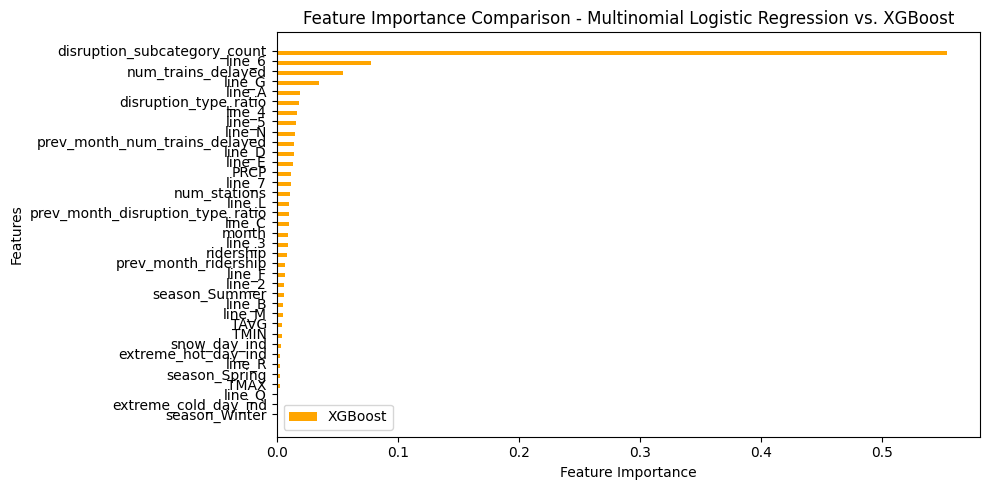

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Extract feature importance for Logistic Regression
coefficients = np.abs(logistic_model1.coef_[0])  # Absolute values for feature importance
normalized_importance = coefficients / np.sum(coefficients)
log_feature_importance_df = pd.DataFrame({
    'Feature': model1_X.columns,
    'Importance_Logistic': np.abs(normalized_importance)  # Take absolute values for importance
})

#Extract feature importance for XGBoost
xgb_feature_importance = xgb_model1.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': model1_X.columns,
    'Importance_XGB': xgb_feature_importance
})

combined_importance_df = log_feature_importance_df.merge(
    xgb_feature_importance_df, on='Feature'
).set_index('Feature')
combined_importance_df = combined_importance_df.sort_values(by='Importance_XGB', ascending=False)
#combined_importance_df = combined_importance_df[combined_importance_df['Importance_XGB'] <= 0.01]

plt.figure(figsize=(10, 5))  # Adjust figure size
bar_width = 0.4
features = combined_importance_df.index
positions_log = range(len(features))
positions_xgb = [pos + bar_width for pos in positions_log]
plt.barh(positions_xgb, combined_importance_df['Importance_XGB'], bar_width, label='XGBoost', color='orange')
#plt.barh(positions_log, combined_importance_df['Importance_Logistic'], bar_width, label='Multinomial Logistic Regression', color='steelblue')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison - Multinomial Logistic Regression vs. XGBoost')
plt.yticks([p + bar_width / 2 for p in positions_log], features)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, log_loss, classification_report

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],  # Controls the complexity of the trees
    'reg_alpha': [0, 0.1, 1],  # L1 regularization term
    'reg_lambda': [1, 5, 10],  # L2 regularization term
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Metric for evaluating the model
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Output progress
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train_encoded)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model on the full training set
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test_encoded = best_xgb_model.predict(X_test)
y_proba_test = best_xgb_model.predict_proba(X_test)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_encoded)

# Predict on the training set
y_pred_train_encoded = best_xgb_model.predict(X_train)
y_proba_train = best_xgb_model.predict_proba(X_train)
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train_encoded)

# Evaluate the performance
test_f1_score = f1_score(y_test, y_pred_test_labels, average='macro')
train_f1_score = f1_score(y_train, y_pred_train_labels, average='macro')

print("Test F1-Score:", test_f1_score)
print("Train F1-Score:", train_f1_score)

print("Train Log-Loss:", log_loss(y_train_encoded, y_proba_train))
print("Test Log-Loss:", log_loss(y_test_encoded, y_proba_test))

print("Classification Report (Test):\n", classification_report(y_test, y_pred_test_labels))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_labels))
'''


'\nfrom sklearn.model_selection import GridSearchCV\nfrom xgboost import XGBClassifier\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.metrics import f1_score, log_loss, classification_report\n\n# Encode target labels\nlabel_encoder = LabelEncoder()\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.transform(y_test)\n\n# Define the parameter grid\nparam_grid = {\n    \'max_depth\': [3, 5, 7],  # Controls the complexity of the trees\n    \'reg_alpha\': [0, 0.1, 1],  # L1 regularization term\n    \'reg_lambda\': [1, 5, 10],  # L2 regularization term\n}\n\n# Initialize the XGBoost classifier\nxgb_model = XGBClassifier(\n    random_state=42,\n    use_label_encoder=False,\n    eval_metric=\'logloss\'\n)\n\n# Apply GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=xgb_model,\n    param_grid=param_grid,\n    scoring=\'f1_macro\',  # Metric for evaluating the model\n    cv=5,  # 5-fold cross-validation\n    verbose=1,  # Output progres

# Final Disruption Exposure Prediction Model: Multinomial Logistic Regression

In [ ]:
model1_X = model1_df_ohe.drop(columns=['reporting_category', 'date', 'month_yr', 'monthly_train_delays', 'TMAX', 'prev_month_disruption_type_ratio', 'month', 'snow_day_ind'])
model1_y = model1_df_ohe['reporting_category']

model1_X.reset_index(drop=True, inplace=True)
model1_y.reset_index(drop=True, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(model1_X, model1_y, test_size=0.2, random_state=42)

logistic_model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logistic_model1.fit(X_train, y_train)

y_test_pred = logistic_model1.predict(X_test)
y_train_pred = logistic_model1.predict(X_train)
y_test_proba = logistic_model1.predict_proba(X_test)
y_train_proba = logistic_model1.predict_proba(X_train)

test_f1_score = f1_score(y_test, y_test_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')
print("Test F1-Score:", test_f1_score)
print("Train F1-Score:", train_f1_score)

print("Train Log-Loss:", log_loss(y_train, y_train_proba))
print("Test Log-Loss:", log_loss(y_test, y_test_proba))

print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test F1-Score: 0.8009512851576795
Train F1-Score: 0.8227109494148976
Train Log-Loss: 0.43211438875212316
Test Log-Loss: 0.4202443267633257
Classification Report (Test):
                             precision    recall  f1-score   support

         Crew Availability       0.91      0.96      0.93       156
          External Factors       0.87      0.93      0.90       138
Infrastructure & Equipment       1.00      1.00      1.00       178
      Operating Conditions       1.00      0.93      0.97       136
          Planned ROW Work       0.46      0.51      0.48       138
          Police & Medical       0.57      0.48      0.52       145

                  accuracy                           0.81       891
                 macro avg       0.80      0.80      0.80       891
              weighted avg       0.81      0.81      0.81       891

Classification Report (Train):
                             precision    recall  f1-score   support

         Crew Availability       0.91      0.9

In [ ]:
disruption_exposure_prediction_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
disruption_exposure_prediction_model.fit(model1_X, model1_y)
disruption_exposure = disruption_exposure_prediction_model.predict_proba(model1_X)


disruption_exposure = pd.DataFrame(disruption_exposure, columns=disruption_exposure_prediction_model.classes_)
disruption_exposure_df = pd.concat([model1_X, disruption_exposure], axis=1)

line_columns = [col for col in disruption_exposure_df.columns if col.startswith('line_')]
disruption_exposure_df['line'] = disruption_exposure_df[line_columns].idxmax(axis=1).str.replace('line_', '')
disruption_exposure_df.loc[disruption_exposure_df[line_columns].sum(axis=1) == 0, 'line'] = '1'

season_columns = [col for col in disruption_exposure_df.columns if col.startswith('season_')]
disruption_exposure_df['season'] = disruption_exposure_df[season_columns].idxmax(axis=1).str.replace('season_', '')

disruption_exposure_df.loc[disruption_exposure_df[season_columns].sum(axis=1) == 0, 'season'] = 'Fall'
disruption_exposure_df.drop(columns=line_columns + season_columns, inplace=True)
disruption_exposure_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,disruption_subcategory_count,num_trains_delayed,disruption_type_ratio,ridership,num_stations,PRCP,TAVG,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,prev_month_num_trains_delayed,prev_month_ridership,Crew Availability,External Factors,Infrastructure & Equipment,Operating Conditions,Planned ROW Work,Police & Medical,line,season
0,-0.611375,2.417944,0.074758,-0.426232,0.338283,1.524507,1.246234,1.262124,1,0,0.0,0.0,8.688941e-01,4.621427e-12,6.522224e-06,5.802448e-02,0.024304,0.048771,1,Summer
1,-0.310649,-1.001711,0.039861,-0.426232,0.338283,1.524507,1.246234,1.262124,1,0,0.0,0.0,2.259416e-02,8.171015e-01,2.054473e-04,3.037582e-05,0.090338,0.069730,1,Summer
2,2.395885,0.924725,0.049774,-0.426232,0.338283,1.524507,1.246234,1.262124,1,0,0.0,0.0,3.396444e-18,3.896897e-14,9.992938e-01,3.457069e-38,0.000226,0.000480,1,Summer
3,-0.912101,-0.794320,0.028169,-0.426232,0.338283,1.524507,1.246234,1.262124,1,0,0.0,0.0,1.141677e-01,6.440533e-03,3.238235e-08,8.786896e-01,0.000396,0.000306,1,Summer
4,-0.310649,-0.651450,0.026018,-0.426232,0.338283,1.524507,1.246234,1.262124,1,0,0.0,0.0,1.065119e-01,2.064199e-01,7.701544e-04,1.331058e-04,0.362071,0.324094,1,Summer


In [ ]:
disruption_exposure_agg = disruption_exposure_df.groupby(['line'])[disruption_exposure_prediction_model.classes_].median()
df = disruption_exposure_agg.unstack().reset_index()
disruption_exposure_agg.median(axis=1).sort_values(ascending=False)
disruption_exposure_agg
#df.groupby('level_0')[0].median().sort_values()

,Crew Availability,External Factors,Infrastructure & Equipment,Operating Conditions,Planned ROW Work,Police & Medical
line,,,,,,
1,0.032133,5.105410e-06,0.000179,4.482730e-05,0.024869,0.012302
2,0.031029,1.066954e-05,0.000309,2.860719e-06,0.023309,0.013327
3,0.058431,1.705046e-03,0.000261,1.073492e-04,0.068181,0.055647
4,0.058896,1.054527e-04,0.000278,1.535935e-04,0.041915,0.024389
5,0.041318,1.954366e-03,0.000278,9.035288e-05,0.039168,0.027195
6,0.047080,3.360611e-07,0.000207,1.228004e-04,0.030727,0.014565
7,0.055767,7.704558e-03,0.001152,1.894311e-04,0.039970,0.031252
A,0.032690,6.925234e-06,0.001146,9.423459e-07,0.016100,0.012823
B,0.018574,6.474389e-04,0.000465,3.289104e-05,0.053689,0.045978


In [ ]:
# Group by line and season, then compute average probabilities for each disruption type
disruption_exposure_agg = disruption_exposure_df.groupby(['line', 'season']).mean()

# Weight probabilities
for disruption_type in disruption_exposure_prediction_model.classes_:
    disruption_exposure_df[f'weighted_{disruption_type}'] = (
        disruption_exposure_df[disruption_type] * disruption_exposure_df['ridership']
    )

disruption_exposure_df[['ridership',
                                  'Crew Availability', 'External Factors', 'Infrastructure & Equipment', 'Operating Conditions', 'Planned ROW Work', 'Police & Medical',
                                  'weighted_Crew Availability', 'weighted_External Factors', 'weighted_Infrastructure & Equipment', 'weighted_Operating Conditions', 'weighted_Planned ROW Work', 'weighted_Police & Medical']].sort_values(by='ridership', ascending=False).head(1)

,ridership,Crew Availability,External Factors,Infrastructure & Equipment,Operating Conditions,Planned ROW Work,Police & Medical,weighted_Crew Availability,weighted_External Factors,weighted_Infrastructure & Equipment,weighted_Operating Conditions,weighted_Planned ROW Work,weighted_Police & Medical
4374,2.655149,1.274819e-14,9.307575e-18,0.985283,5.163669e-32,0.004638,0.010079,3.384835e-14,2.471299e-17,2.616071,1.371031e-31,0.012316,0.026762


In [ ]:
# Group by line and season, then compute average probabilities for each disruption type
disruption_exposure_agg = disruption_exposure_df.groupby(['line', 'season']).mean()

# Weight probabilities
for disruption_type in disruption_exposure_prediction_model.classes_:
    disruption_exposure_df[f'weighted_{disruption_type}'] = (
        disruption_exposure_df[disruption_type] * disruption_exposure_df['ridership']
    )

# Aggregate weighted probabilities by line and season
weighted_disruption_exposure_agg = disruption_exposure_df.groupby(['line', 'season']).mean()

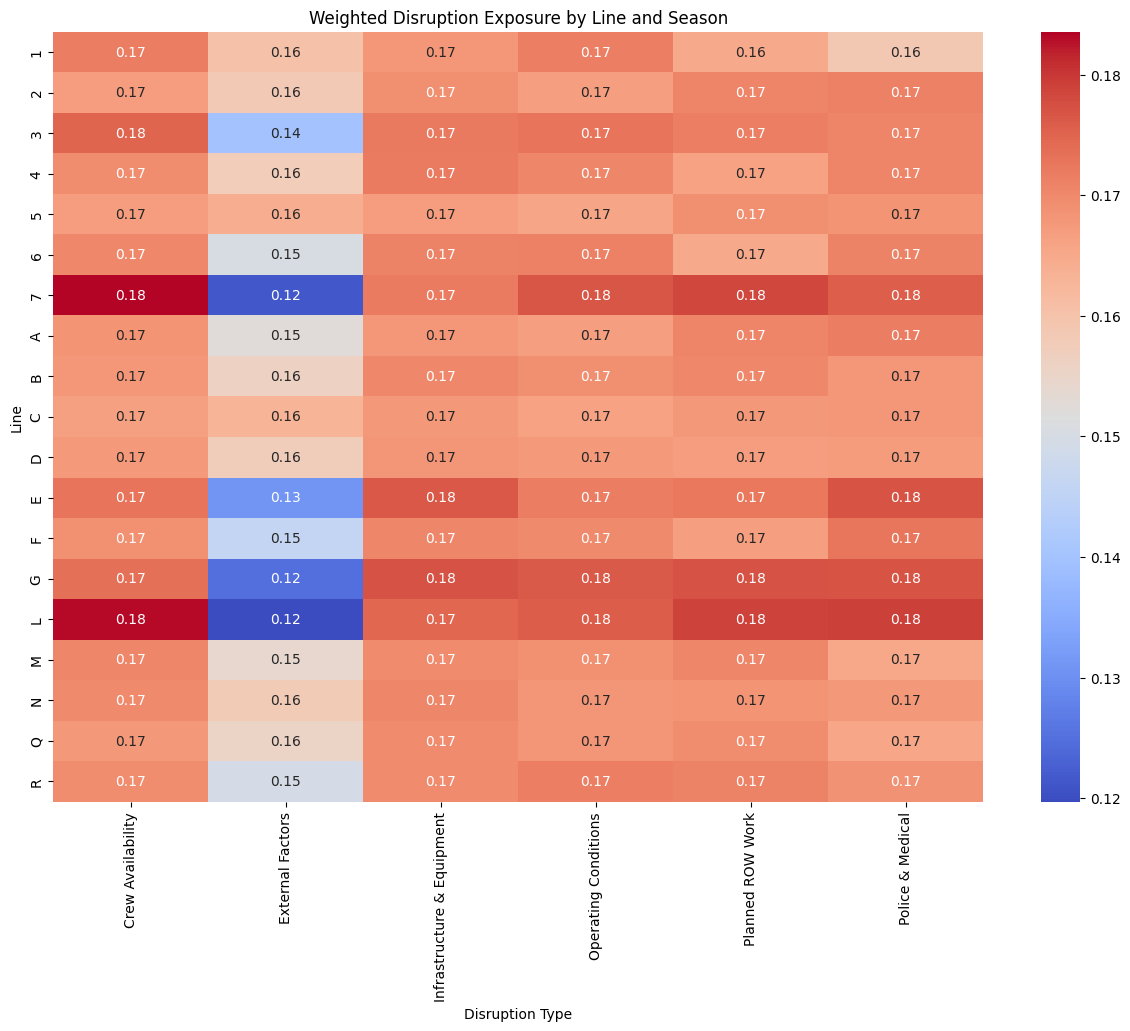

In [ ]:
import seaborn as sns
final_disruption_exposure_agg = weighted_disruption_exposure_agg.groupby('line').median()[disruption_exposure_prediction_model.classes_]

# Example visualization
plt.figure(figsize=(15, 10))  #
sns.heatmap(final_disruption_exposure_agg, cmap='coolwarm', annot=True)
plt.title('Weighted Disruption Exposure by Line and Season')
plt.xlabel('Disruption Type')
plt.ylabel('Line')
plt.show()

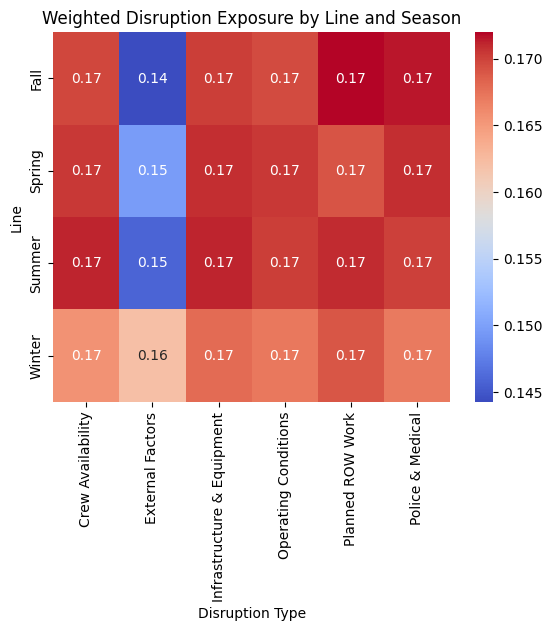

In [ ]:
import seaborn as sns
final_disruption_exposure_agg = weighted_disruption_exposure_agg.groupby('season').median()[disruption_exposure_prediction_model.classes_]

# Example visualization
sns.heatmap(final_disruption_exposure_agg, cmap='coolwarm', annot=True)
plt.title('Weighted Disruption Exposure by Line and Season')
plt.xlabel('Disruption Type')
plt.ylabel('Line')
plt.show()

# Model 2: Disruption Impact Prediction

In [ ]:
model2_df = preprocessing_df[['date', 'month', 'month_yr', 'line', 'reporting_category', 'disruption_subcategory_count', 'ridership',
                              'num_stations', 'num_trains_delayed', 'disruption_type_ratio',
                              'season', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN', 'extreme_hot_day_ind', 'extreme_cold_day_ind', 'snow_day_ind',
                              'Bronx_Ind', 'Brooklyn_Ind', 'Manhattan_Ind', 'Queens_Ind', 'Staten_Ind',
                              'additional_journey_time']]

model2_df.head()

,date,month,month_yr,line,reporting_category,disruption_subcategory_count,ridership,num_stations,num_trains_delayed,disruption_type_ratio,season,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind,additional_journey_time
0,2021-07-01,7,2021-07,1,Crew Availability,1,2240734.2,39.0,765,0.074758,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
1,2021-07-01,7,2021-07,1,External Factors,2,2240734.2,39.0,23,0.039861,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
2,2021-07-01,7,2021-07,1,Infrastructure & Equipment,11,2240734.2,39.0,441,0.049774,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
3,2021-07-01,7,2021-07,1,Operating Conditions,0,2240734.2,39.0,68,0.028169,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
4,2021-07-01,7,2021-07,1,Planned ROW Work,2,2240734.2,39.0,99,0.026018,Summer,76.38,0.0,76.2,84.455556,67.977778,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453


In [ ]:
features_to_normalize = ['ridership', 'num_stations','disruption_subcategory_count','num_trains_delayed', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN',]

# Standardization (z-score normalization, mean=0, std=1)
standard_scaler = StandardScaler()
model2_df[features_to_normalize] = standard_scaler.fit_transform(model2_df[features_to_normalize])
model2_df.head()


<ipython-input-258-a968d65f78bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2_df[features_to_normalize] = standard_scaler.fit_transform(model2_df[features_to_normalize])


,date,month,month_yr,line,reporting_category,disruption_subcategory_count,ridership,num_stations,num_trains_delayed,disruption_type_ratio,season,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind,additional_journey_time
0,2021-07-01,7,2021-07,1,Crew Availability,-0.611375,-0.426232,0.338283,2.417944,0.074758,Summer,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
1,2021-07-01,7,2021-07,1,External Factors,-0.310649,-0.426232,0.338283,-1.001711,0.039861,Summer,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
2,2021-07-01,7,2021-07,1,Infrastructure & Equipment,2.395885,-0.426232,0.338283,0.924725,0.049774,Summer,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
3,2021-07-01,7,2021-07,1,Operating Conditions,-0.912101,-0.426232,0.338283,-0.794320,0.028169,Summer,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453
4,2021-07-01,7,2021-07,1,Planned ROW Work,-0.310649,-0.426232,0.338283,-0.651450,0.026018,Summer,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453


In [ ]:
#Adding Disruption Frequency in Previous Month
model2_df = model2_df.copy()
model2_df['date'] = pd.to_datetime(model2_df['date'])
model2_df['month_yr'] = model2_df['month_yr'].dt.to_timestamp()
model2_df['previous_month_yr'] = model2_df['month_yr'] - pd.offsets.MonthBegin(1)

model2_df = pd.merge(model2_df, model2_df[['line', 'month_yr', 'reporting_category', 'num_trains_delayed', 'disruption_type_ratio', 'ridership']],
                     left_on=['line','reporting_category', 'previous_month_yr'],
                     right_on=['line', 'reporting_category', 'month_yr'],
                     how='left')

model2_df['prev_month_num_trains_delayed'] = model2_df['num_trains_delayed_y'].fillna(0)
model2_df['prev_month_disruption_type_ratio'] = model2_df['disruption_type_ratio_y'].fillna(0)
model2_df['prev_month_ridership'] = model2_df['ridership_y'].fillna(0)
#model1_df['prev_month_disruption_subcategory_count'] = model1_df['disruption_subcategory_count_y'].fillna(0)

model2_df = model2_df.drop(columns={'previous_month_yr', 'month_yr_y', 'num_trains_delayed_y', 'disruption_type_ratio_y', 'ridership_y'})
model2_df.rename(columns={'month_yr_x': 'month_yr', 'num_trains_delayed_x':'num_trains_delayed', 'disruption_type_ratio_x': 'disruption_type_ratio', 'ridership_x': 'ridership'}, inplace=True)

#Check
model2_df[(model2_df['reporting_category'] == 'Infrastructure & Equipment') & (model2_df['line'] == '1')].sort_values(by=['month_yr'], ascending=True)[['date', 'month_yr', 'line', 'reporting_category',
                                                                                                                                                        'num_trains_delayed', 'disruption_type_ratio', 'ridership',
                                                                                                                                                        'prev_month_num_trains_delayed', 'prev_month_disruption_type_ratio', 'prev_month_ridership']].head()

,date,month_yr,line,reporting_category,num_trains_delayed,disruption_type_ratio,ridership,prev_month_num_trains_delayed,prev_month_disruption_type_ratio,prev_month_ridership
2,2021-07-01,2021-07-01,1,Infrastructure & Equipment,0.924725,0.049774,-0.426232,0.000000,0.000000,0.000000
131,2021-08-01,2021-08-01,1,Infrastructure & Equipment,-0.531624,0.017653,-0.129171,0.924725,0.049774,-0.426232
260,2021-09-01,2021-09-01,1,Infrastructure & Equipment,0.007594,0.027295,-0.374760,-0.531624,0.017653,-0.129171
391,2021-10-01,2021-10-01,1,Infrastructure & Equipment,0.459246,0.054786,0.388635,0.007594,0.027295,-0.374760
519,2021-11-01,2021-11-01,1,Infrastructure & Equipment,-0.038493,0.032983,0.774447,0.459246,0.054786,0.388635


In [ ]:
model2_df_ohe = pd.get_dummies(model2_df, columns=['line', 'season', 'reporting_category'], drop_first=True)
model2_df_ohe = model2_df_ohe.dropna()
model2_df_ohe.head()

,date,month,month_yr,disruption_subcategory_count,ridership,num_stations,num_trains_delayed,disruption_type_ratio,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind,additional_journey_time,prev_month_num_trains_delayed,prev_month_disruption_type_ratio,prev_month_ridership,line_2,line_3,line_4,line_5,line_6,line_7,line_A,line_B,line_C,line_D,line_E,line_F,line_G,line_GS,line_JZ,line_L,line_M,line_N,line_Q,line_R,line_S Fkln,line_S Rock,season_Spring,season_Summer,season_Winter,reporting_category_External Factors,reporting_category_Infrastructure & Equipment,reporting_category_Operating Conditions,reporting_category_Planned ROW Work,reporting_category_Police & Medical
0,2021-07-01,7,2021-07-01,-0.611375,-0.426232,0.338283,2.417944,0.074758,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2021-07-01,7,2021-07-01,-0.310649,-0.426232,0.338283,-1.001711,0.039861,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,2021-07-01,7,2021-07-01,2.395885,-0.426232,0.338283,0.924725,0.049774,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,2021-07-01,7,2021-07-01,-0.912101,-0.426232,0.338283,-0.794320,0.028169,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
4,2021-07-01,7,2021-07-01,-0.310649,-0.426232,0.338283,-0.651450,0.026018,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,1.457453,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
model2_df_ohe.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4455,2023-02-13 05:18:23.030302976,2021-07-01 00:00:00,2022-04-01 00:00:00,2023-02-01 00:00:00,2023-12-01 00:00:00,2024-10-01 00:00:00,NaN
month,4455.0,6.696521,1.0,4.0,7.0,10.0,12.0,3.363133
month_yr,4455,2023-02-13 05:18:23.030302976,2021-07-01 00:00:00,2022-04-01 00:00:00,2023-02-01 00:00:00,2023-12-01 00:00:00,2024-10-01 00:00:00,NaN
disruption_subcategory_count,4455.0,0.04975,-0.912101,-0.611375,-0.310649,-0.009923,2.696611,1.038921
ridership,4455.0,0.222195,-1.705909,-0.37096,0.126493,0.781757,2.655149,0.827269
num_stations,4455.0,0.0,-1.800204,-1.022573,0.143875,0.824303,1.50473,1.000112
num_trains_delayed,4455.0,0.128818,-1.103103,-0.669885,-0.056928,0.687377,5.326033,1.001689
disruption_type_ratio,4455.0,0.051072,0.000341,0.028436,0.045973,0.065357,0.443425,0.035774
PRCP,4455.0,0.000567,-1.729428,-0.711852,-0.206482,0.489844,2.924849,1.000876
SNOW,4455.0,-0.000592,-0.325806,-0.325806,-0.325806,-0.321531,5.25701,0.99639


# Model 2: Disruption Impact Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define predictors and target
model2_X = model2_df_ohe.drop(columns=['date', 'additional_journey_time', 'month_yr'])  # Drop non-predictive columns
model2_y = model2_df_ohe['additional_journey_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(model2_X, model2_y, test_size=0.2, random_state=42)

# Initialize and fit the model
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)

# Predict on the test and train set
y_test_pred = linear_model2.predict(X_test)
y_train_pred = linear_model2.predict(X_train)

# Calculate metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print the results
print("Test Mean Absolute Error (MAE):", test_mae)
print("Train Mean Absolute Error (MAE):", train_mae)
print("\n")
print("Test Mean Squared Error (MSE):", test_mse)
print("Train Mean Squared Error (MSE):", train_mse)
print("\n")
print("Test R-squared:", test_r2)
print("Train R-squared:", train_r2)

Test Mean Absolute Error (MAE): 0.279742340113209
Train Mean Absolute Error (MAE): 0.28157321723240714


Test Mean Squared Error (MSE): 0.13576202100943396
Train Mean Squared Error (MSE): 0.14359139428438084


Test R-squared: 0.5679402703263972
Train R-squared: 0.5561222083099115


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost model
xgb_model2 = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum depth of a tree
    random_state=42
)

# Fit the model
xgb_model2.fit(X_train, y_train)

# Predict on both the test and train set
y_test_pred_xgb = xgb_model2.predict(X_test)
y_train_pred_xgb = xgb_model2.predict(X_train)

# Calculate metrics for test and train sets
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)

test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)

test_rmse_xgb = np.sqrt(test_mse_xgb)
train_rmse_xgb = np.sqrt(train_mse_xgb)

test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

# Print the results
print(f"XGBoost Model Metrics:")
print(f"Test Mean Absolute Error (MAE): {test_mae_xgb}")
print(f"Train Mean Absolute Error (MAE): {train_mae_xgb}")
print("\n")
print(f"Test Mean Squared Error (MSE): {test_mse_xgb}")
print(f"Train Mean Squared Error (MSE): {train_mse_xgb}")
print("\n")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_xgb}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_xgb}")
print("\n")
print(f"Test R² Score: {test_r2_xgb}")
print(f"Train R² Score: {train_r2_xgb}")

XGBoost Model Metrics:
Test Mean Absolute Error (MAE): 0.15706479810825608
Train Mean Absolute Error (MAE): 0.14142786595197762


Test Mean Squared Error (MSE): 0.041881942551722305
Train Mean Squared Error (MSE): 0.03595879275458238


Test Root Mean Squared Error (RMSE): 0.20465078194749783
Train Root Mean Squared Error (RMSE): 0.18962803789150584


Test R² Score: 0.8667116131407246
Train R² Score: 0.8888421579907887


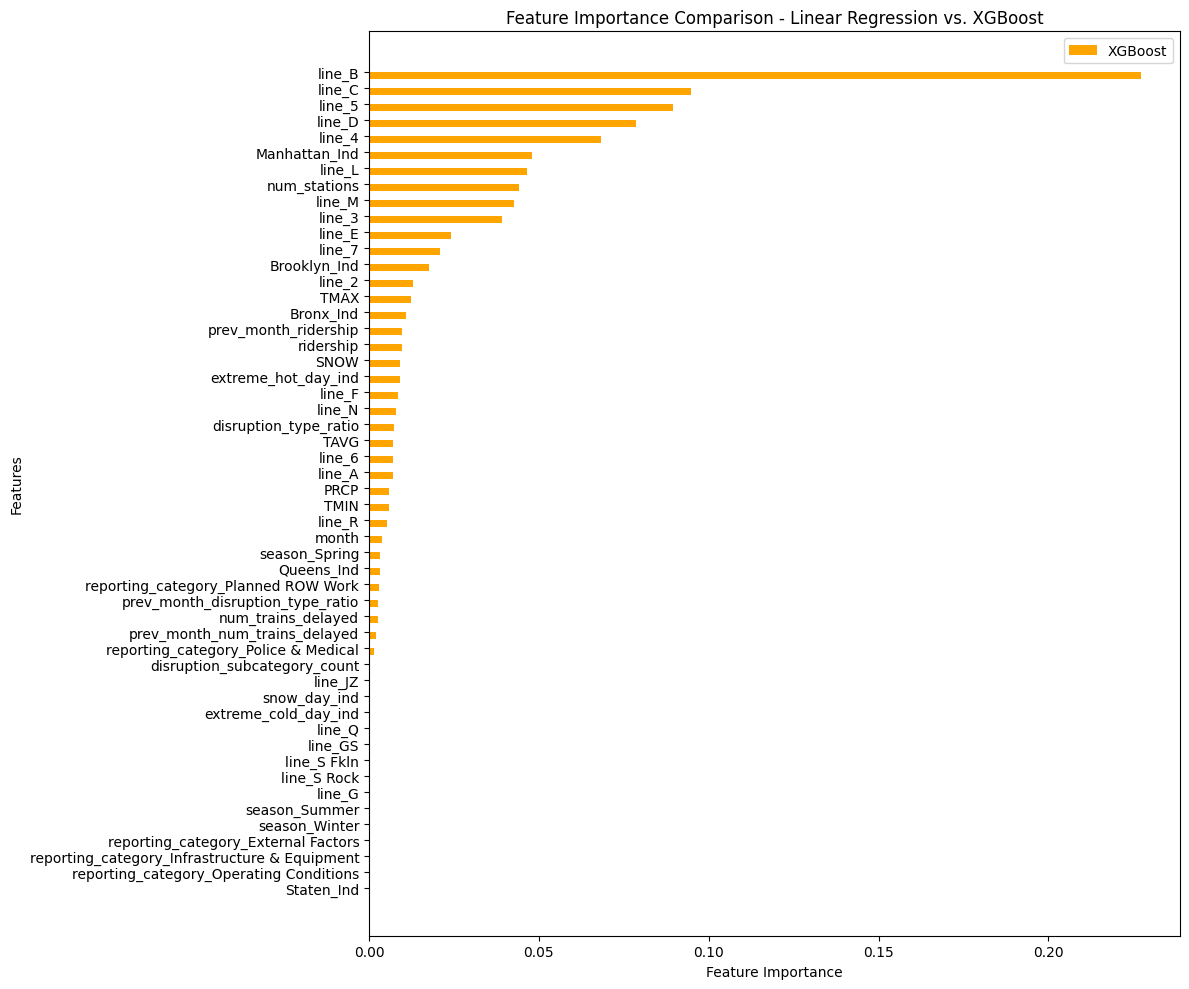

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Assuming the models are already trained: linear_model and xgb_model2

# Extract feature importance for Linear Regression
linear_coefficients = np.abs(linear_model2.coef_)  # Absolute values for feature importance
normalized_linear_importance = linear_coefficients / np.sum(linear_coefficients)
linear_feature_importance_df = pd.DataFrame({
    'Feature': model2_X.columns,
    'Importance_Linear': normalized_linear_importance
})

# Extract feature importance for XGBoost
xgb_feature_importance = xgb_model2.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': model2_X.columns,
    'Importance_XGB': xgb_feature_importance
})

# Combine the feature importance dataframes
combined_importance_df = linear_feature_importance_df.merge(
    xgb_feature_importance_df, on='Feature'
).set_index('Feature')
combined_importance_df = combined_importance_df.sort_values(by='Importance_XGB', ascending=False)

# Plot the feature importance comparison
plt.figure(figsize=(12, 10))  # Adjust figure size
bar_width = 0.4
features = combined_importance_df.index
positions_linear = range(len(features))
positions_xgb = [pos + bar_width for pos in positions_linear]
plt.barh(positions_xgb, combined_importance_df['Importance_XGB'], bar_width, label='XGBoost', color='orange')
#plt.barh(positions_linear, combined_importance_df['Importance_Linear'], bar_width, label='Linear Regression', color='steelblue')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison - Linear Regression vs. XGBoost')
plt.yticks([p + bar_width / 2 for p in positions_linear], features)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Final Disruption Impact Prediction Model

In [ ]:
model2_X = model2_df_ohe.drop(columns=['date', 'additional_journey_time', 'month_yr'])  # Drop non-predictive columns
model2_y = model2_df_ohe['additional_journey_time']

disruption_impact_prediction_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum depth of a tree
    random_state=42
)

disruption_impact_prediction_model.fit(model2_X, model2_y)
disruption_impact = disruption_impact_prediction_model.predict(model2_X)
disruption_impact_df = model2_X.copy()
disruption_impact_df['pred_disruption_impact']= disruption_impact
disruption_impact_df.head()

line_columns = [col for col in disruption_impact_df.columns if col.startswith('line_')]
disruption_impact_df['line'] = disruption_impact_df[line_columns].idxmax(axis=1).str.replace('line_', '')
disruption_impact_df.loc[disruption_impact_df[line_columns].sum(axis=1) == 0, 'line'] = '1'

season_columns = [col for col in disruption_impact_df.columns if col.startswith('season_')]
disruption_impact_df['season'] = disruption_impact_df[season_columns].idxmax(axis=1).str.replace('season_', '')
disruption_impact_df.loc[disruption_impact_df[season_columns].sum(axis=1) == 0, 'season'] = 'Fall'

reporting_category_columns = [col for col in disruption_impact_df.columns if col.startswith('reporting_category_')]
disruption_impact_df['reporting_category'] = disruption_impact_df[reporting_category_columns].idxmax(axis=1).str.replace('reporting_category_', '')
disruption_impact_df.loc[disruption_impact_df[reporting_category_columns].sum(axis=1) == 0, 'reporting_category'] = 'Crew Availability'

disruption_impact_df.drop(columns=line_columns + season_columns + reporting_category_columns, inplace=True)
disruption_impact_df.sort_values(by='pred_disruption_impact', ascending=False).head()

,month,disruption_subcategory_count,ridership,num_stations,num_trains_delayed,disruption_type_ratio,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind,prev_month_num_trains_delayed,prev_month_disruption_type_ratio,prev_month_ridership,pred_disruption_impact,line,season,reporting_category
4443,5,-0.009923,0.101593,-0.342145,1.150551,0.055962,-0.540548,-0.325806,0.427053,0.428575,0.424684,1,0,0,1.0,1.0,1.0,0.0,0.0,0.454638,0.040536,0.254577,3.422795,B,Spring,Police & Medical
4438,5,-0.611375,0.101593,-0.342145,-0.540841,0.068333,-0.540548,-0.325806,0.427053,0.428575,0.424684,1,0,0,1.0,1.0,1.0,0.0,0.0,-0.628407,0.068197,0.254577,3.411127,B,Spring,Crew Availability
4439,5,-0.310649,0.101593,-0.342145,-0.987885,0.041074,-0.540548,-0.325806,0.427053,0.428575,0.424684,1,0,0,1.0,1.0,1.0,0.0,0.0,-1.029364,0.019540,0.254577,3.403689,B,Spring,External Factors
4440,5,2.395885,0.101593,-0.342145,0.698899,0.040479,-0.540548,-0.325806,0.427053,0.428575,0.424684,1,0,0,1.0,1.0,1.0,0.0,0.0,0.947769,0.040846,0.254577,3.403565,B,Spring,Infrastructure & Equipment
4181,3,2.095159,-0.026728,-0.342145,1.242725,0.049892,1.473244,-0.325806,-0.754266,-0.745924,-0.762767,0,1,0,1.0,1.0,1.0,0.0,0.0,1.007682,0.053261,-0.385101,3.390423,B,Spring,Infrastructure & Equipment


In [ ]:
df = disruption_impact_df.groupby(['line', 'reporting_category'])['pred_disruption_impact'].median().sort_values(ascending=False).reset_index()

#df.pivot(index='line', columns='reporting_category', values='pred_disruption_impact')
disruption_impact_df.groupby(['reporting_category'])['pred_disruption_impact'].median().sort_values(ascending=False).reset_index()

,reporting_category,pred_disruption_impact
0,External Factors,1.735002
1,Infrastructure & Equipment,1.718512
2,Police & Medical,1.718151
3,Operating Conditions,1.713817
4,Crew Availability,1.713267
5,Planned ROW Work,1.711310


In [ ]:
disruption_impact_df['pred_disruption_impact'].describe()

,pred_disruption_impact
count,4455.000000
mean,1.736002
std,0.472567
min,0.131096
25%,1.452966
50%,1.719009
75%,2.055560
max,3.422795


In [ ]:
disruption_impact_by_line = disruption_impact_df.groupby(['line', 'season', 'reporting_category'])[['pred_disruption_impact', 'ridership', 'num_stations']].mean().reset_index()
disruption_impact_by_line.head()

,line,season,reporting_category,pred_disruption_impact,ridership,num_stations
0,1,Fall,Crew Availability,1.754191,1.213839,0.338283
1,1,Fall,External Factors,1.772217,1.181952,0.338283
2,1,Fall,Infrastructure & Equipment,1.771824,1.213839,0.338283
3,1,Fall,Operating Conditions,1.802019,1.213839,0.338283
4,1,Fall,Planned ROW Work,1.752292,1.213839,0.338283


In [ ]:
disruption_exposure_by_line = disruption_exposure_df[['season', 'line',
                                  'weighted_Crew Availability', 'weighted_External Factors', 'weighted_Infrastructure & Equipment', 'weighted_Operating Conditions', 'weighted_Planned ROW Work', 'weighted_Police & Medical']].sort_values(by='line', ascending=True)

disruption_exposure_long = disruption_exposure_by_line.melt(
    id_vars=['season', 'line'],
    var_name='disruption_category',
    value_name='probability_of_disruption_exposure'
)

disruption_exposure_long['reporting_category'] = disruption_exposure_long['disruption_category'].str.replace('weighted_', '')
disruption_exposure_long = disruption_exposure_long.groupby(['season', 'line', 'reporting_category'])['probability_of_disruption_exposure'].mean().reset_index()
disruption_exposure_long.head()

,season,line,reporting_category,probability_of_disruption_exposure
0,Fall,1,Crew Availability,0.212967
1,Fall,1,External Factors,0.164904
2,Fall,1,Infrastructure & Equipment,0.203983
3,Fall,1,Operating Conditions,0.202909
4,Fall,1,Planned ROW Work,0.229059


# Line Criticality Clustering

In [ ]:
disruption_impact_df.head()

,month,disruption_subcategory_count,ridership,num_stations,num_trains_delayed,disruption_type_ratio,PRCP,SNOW,TAVG,TMAX,TMIN,extreme_hot_day_ind,extreme_cold_day_ind,snow_day_ind,Bronx_Ind,Brooklyn_Ind,Manhattan_Ind,Queens_Ind,Staten_Ind,prev_month_num_trains_delayed,prev_month_disruption_type_ratio,prev_month_ridership,pred_disruption_impact,line,season,reporting_category
0,7,-0.611375,-0.426232,0.338283,2.417944,0.074758,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.569737,1,Summer,Crew Availability
1,7,-0.310649,-0.426232,0.338283,-1.001711,0.039861,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.473007,1,Summer,External Factors
2,7,2.395885,-0.426232,0.338283,0.924725,0.049774,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.470902,1,Summer,Infrastructure & Equipment
3,7,-0.912101,-0.426232,0.338283,-0.794320,0.028169,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.449037,1,Summer,Operating Conditions
4,7,-0.310649,-0.426232,0.338283,-0.651450,0.026018,1.524507,-0.325806,1.246234,1.228733,1.262124,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.449037,1,Summer,Planned ROW Work


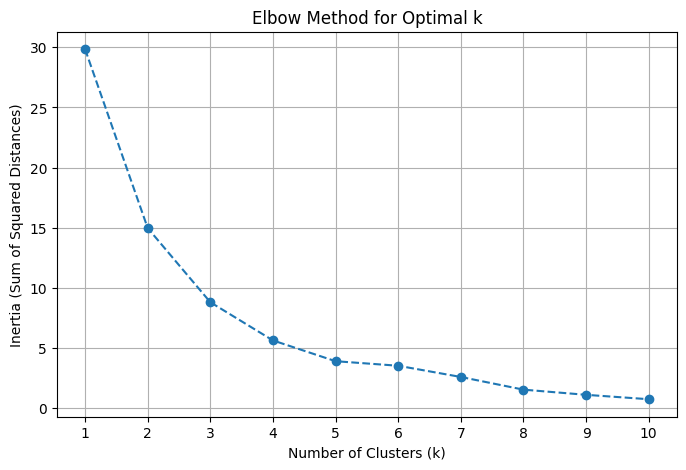

In [ ]:
# Merge the exposure and impact DataFrames
criticality_df = disruption_exposure_long.merge(
    disruption_impact_by_line,
    on=['line', 'season', 'reporting_category'],
    how='outer'  # Use inner join to ensure matching rows
)

criticality_df['criticality_score'] = (
    criticality_df['probability_of_disruption_exposure'] * criticality_df['pred_disruption_impact']
)

criticality_df.head()

# Aggregate criticality scores by line
line_criticality = criticality_df.groupby(['line'])[['criticality_score', 'ridership', 'num_stations']].mean().reset_index()

# Optional: Normalize the criticality score for comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
line_criticality['normalized_criticality_score'] = scaler.fit_transform(line_criticality[['criticality_score']])

# View the final criticality scores
line_criticality.head()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare data for clustering
X = line_criticality[['normalized_criticality_score', 'ridership', 'num_stations']]  # Only use the feature(s) for clustering

# Initialize a list to store the inertia values
inertia = []

# Iterate over a range of k values
k_range = range(1, 11)  # Test k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the sum of squared distances for this k

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid()
plt.show()

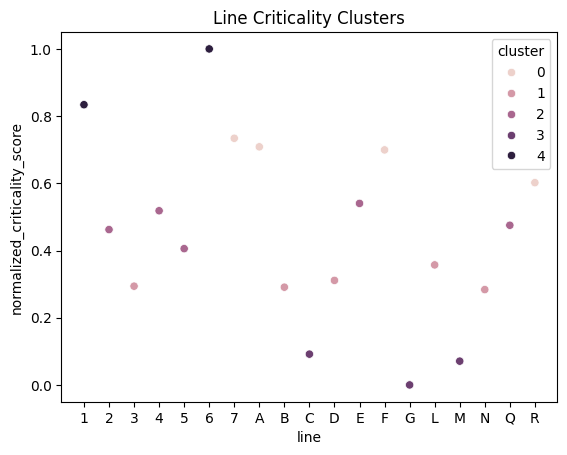

In [ ]:
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)
line_criticality['cluster'] = kmeans.fit_predict(line_criticality[['normalized_criticality_score']])

# Visualize the clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=line_criticality, x='line', y='normalized_criticality_score', hue='cluster')
plt.title('Line Criticality Clusters')
plt.show()


   cluster  normalized_criticality_score
0        0                      0.704047
1        1                      0.293918
2        2                      0.475211
3        3                      0.070773
4        4                      0.917000


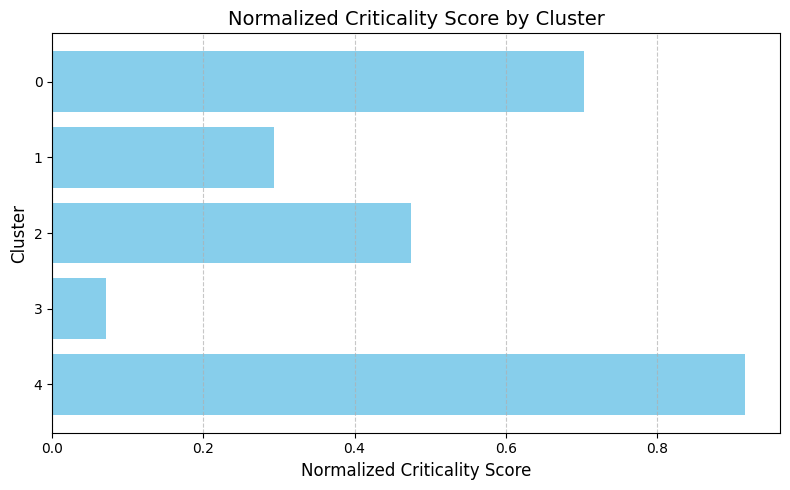

In [ ]:
df = line_criticality.groupby('cluster')['normalized_criticality_score'].median().reset_index()
print(df)
plt.figure(figsize=(8, 5))
plt.barh(df['cluster'], df['normalized_criticality_score'], color='skyblue')
plt.xlabel('Normalized Criticality Score', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.title('Normalized Criticality Score by Cluster', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to match the example layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#.sort_values(by='normalized_criticality_score', ascending=False)

   cluster  probability_of_disruption_exposure
0        0                            0.149922
1        1                            0.033934
2        2                            0.044109
3        3                            0.020688
4        4                            0.229132


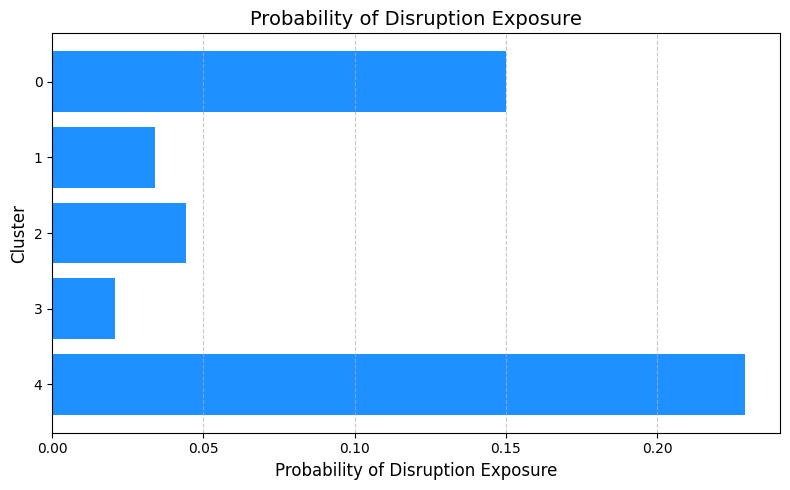

In [ ]:
criticality_df_by_line = criticality_df.groupby('line')[['probability_of_disruption_exposure', 'pred_disruption_impact']].median().reset_index()
combined_df = pd.merge(criticality_df_by_line, line_criticality, on=['line'], how='left')
df = combined_df.groupby('cluster')['probability_of_disruption_exposure'].median().reset_index()
df['probability_of_disruption_exposure'] = np.abs(df['probability_of_disruption_exposure'])
df.iloc[3, 1] = 0.020688

print(df)
plt.figure(figsize=(8, 5))
plt.barh(df['cluster'], df['probability_of_disruption_exposure'], color='dodgerblue')
plt.xlabel('Probability of Disruption Exposure', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.title('Probability of Disruption Exposure', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to match the example layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#.sort_values(ascending=False)

   cluster  pred_disruption_impact
0        0                1.685813
1        1                1.881225
2        2                1.467190
3        3                1.956421
4        4                1.828827


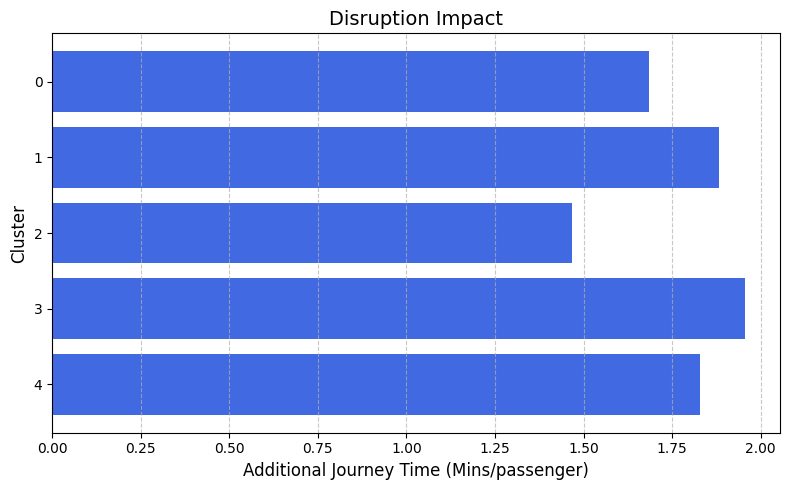

In [ ]:
criticality_df_by_line = criticality_df.groupby('line')[['probability_of_disruption_exposure', 'pred_disruption_impact']].median().reset_index()
combined_df = pd.merge(criticality_df_by_line, line_criticality, on=['line'], how='left')
df = combined_df.groupby('cluster')['pred_disruption_impact'].mean().reset_index()
print(df)
plt.figure(figsize=(8, 5))
plt.barh(df['cluster'], df['pred_disruption_impact'], color='royalblue')
plt.xlabel('Additional Journey Time (Mins/passenger)', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.title('Disruption Impact', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to match the example layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#.sort_values(ascending=False)

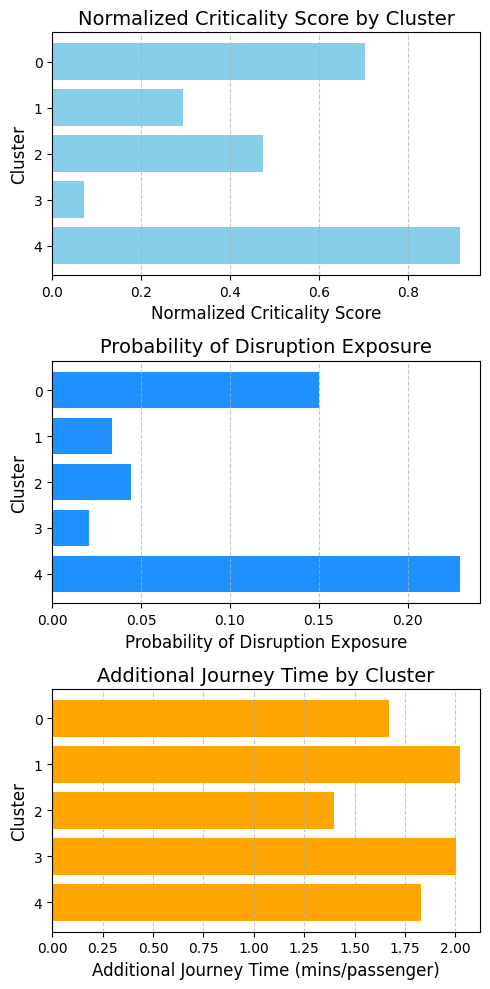

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# First plot (Normalized Criticality Score by Cluster)
df = line_criticality.groupby('cluster')['normalized_criticality_score'].median().reset_index()

# Second plot (Probability of Disruption Exposure by Cluster)
criticality_df_by_line = criticality_df.groupby('line')[['probability_of_disruption_exposure', 'pred_disruption_impact']].median().reset_index()
combined_df = pd.merge(criticality_df_by_line, line_criticality, on=['line'], how='left')
df2 = combined_df.groupby('cluster')['probability_of_disruption_exposure'].median().reset_index()
df2['probability_of_disruption_exposure'] = np.abs(df2['probability_of_disruption_exposure'])
df2.iloc[3, 1] = 0.020688

# Third plot (Pred Disruption Impact by Cluster)
df3 = combined_df.groupby('cluster')['pred_disruption_impact'].median().reset_index()

# Create subplots (3 vertical charts)
fig, ax = plt.subplots(3, 1, figsize=(5, 10))  # Create 3 subplots vertically

# First Bar Chart
ax[0].barh(df['cluster'], df['normalized_criticality_score'], color='skyblue')
ax[0].set_xlabel('Normalized Criticality Score', fontsize=12)
ax[0].set_ylabel('Cluster', fontsize=12)
ax[0].set_title('Normalized Criticality Score by Cluster', fontsize=14)
ax[0].invert_yaxis()  # Invert y-axis to match the example layout
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Second Bar Chart
ax[1].barh(df2['cluster'], df2['probability_of_disruption_exposure'], color='dodgerblue')
ax[1].set_xlabel('Probability of Disruption Exposure', fontsize=12)
ax[1].set_ylabel('Cluster', fontsize=12)
ax[1].set_title('Probability of Disruption Exposure', fontsize=14)
ax[1].invert_yaxis()  # Invert y-axis to match the example layout
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

# Third Bar Chart
ax[2].barh(df3['cluster'], df3['pred_disruption_impact'], color='orange')
ax[2].set_xlabel('Additional Journey Time (mins/passenger)', fontsize=12)
ax[2].set_ylabel('Cluster', fontsize=12)
ax[2].set_title('Additional Journey Time by Cluster', fontsize=14)
ax[2].invert_yaxis()  # Invert y-axis to match the example layout
ax[2].grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
combined_df.sort_values(by='cluster', ascending=True)[['line', 'cluster']]

,line,cluster
18,R,0
6,7,0
7,A,0
12,F,0
2,3,1
16,N,1
8,B,1
10,D,1
14,L,1
1,2,2


<ipython-input-204-153a2c05cc02>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=line_criticality, x='cluster', y=feature, palette='viridis')


Plot saved as criticality_score_by_cluster.png


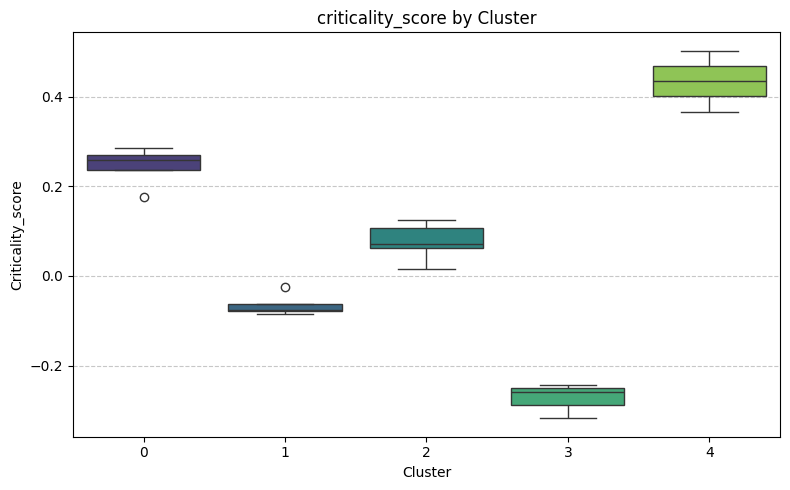

<ipython-input-204-153a2c05cc02>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=line_criticality, x='cluster', y=feature, palette='viridis')


Plot saved as ridership_by_cluster.png


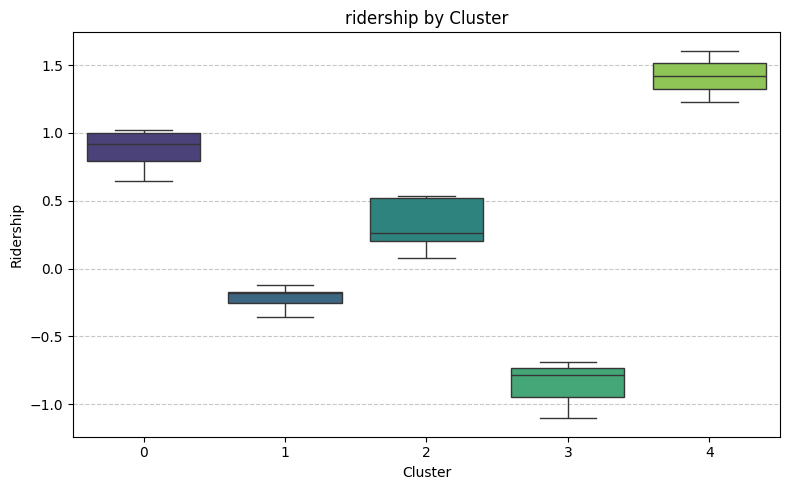

<ipython-input-204-153a2c05cc02>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=line_criticality, x='cluster', y=feature, palette='viridis')


Plot saved as num_stations_by_cluster.png


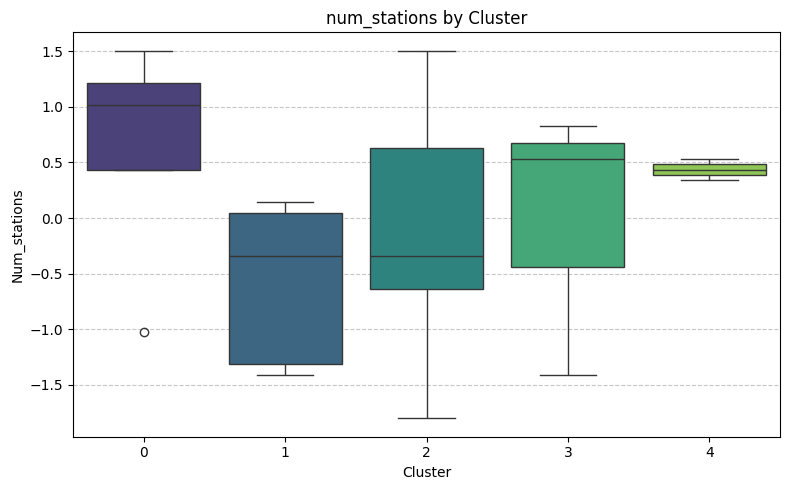

In [ ]:

# Features to plot
features = ['criticality_score', 'ridership', 'num_stations']

# Generate and save the plots
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=line_criticality, x='cluster', y=feature, palette='viridis')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot to a file
    file_name = f"{feature}_by_cluster.png"
    plt.savefig(file_name)
    print(f"Plot saved as {file_name}")
    plt.show()

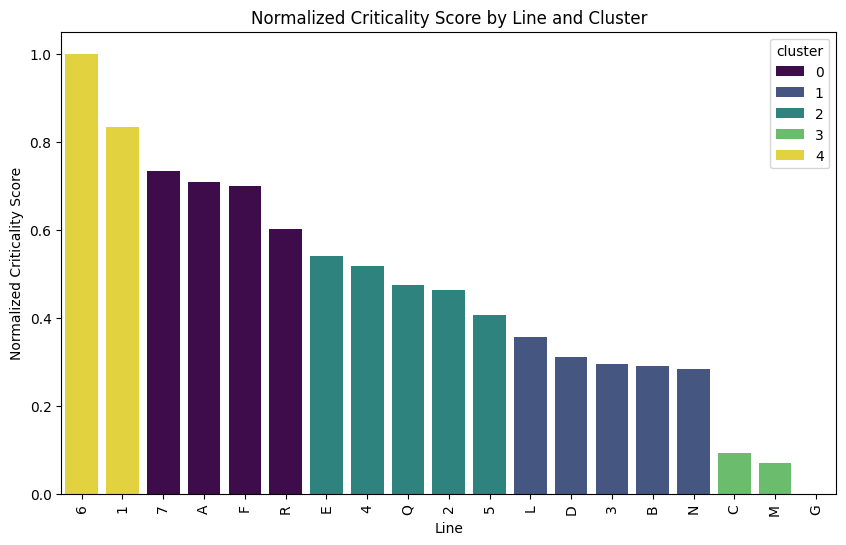

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'line_criticality'
# Sort the DataFrame by normalized_criticality_score in descending order
line_criticality_sorted = line_criticality.sort_values('normalized_criticality_score', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='line', y='normalized_criticality_score', data=line_criticality_sorted,
            hue='cluster', dodge=False, palette='viridis')

# Set plot labels and title
plt.title('Normalized Criticality Score by Line and Cluster')
plt.xlabel('Line')
plt.ylabel('Normalized Criticality Score')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


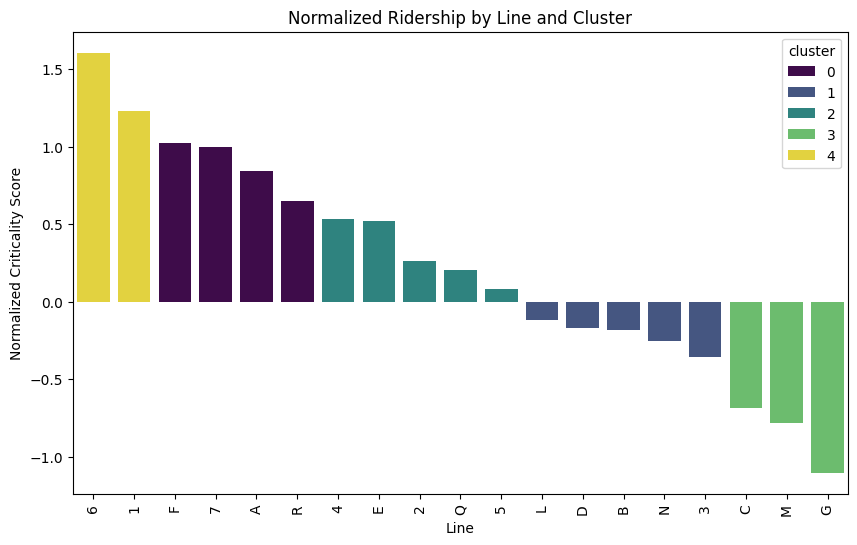

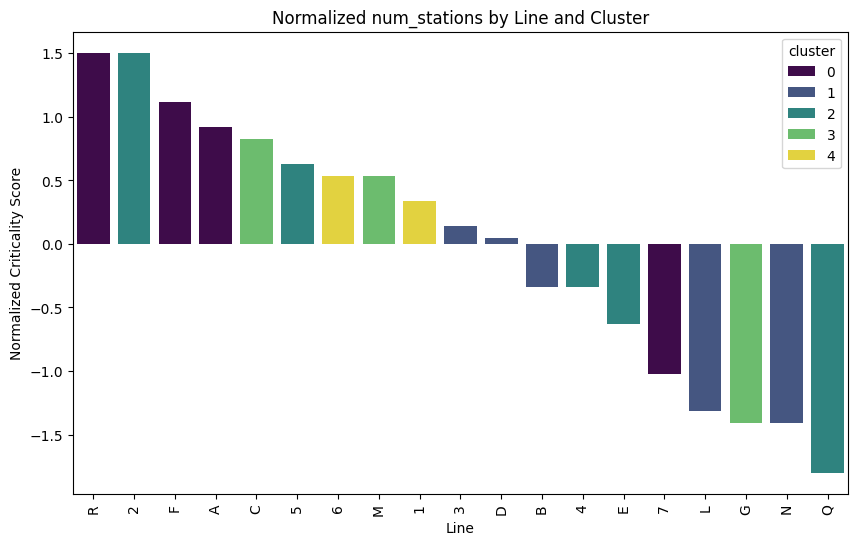

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'line_criticality'
# Sort the DataFrame by normalized_criticality_score in descending order
line_criticality_sorted = line_criticality.sort_values('ridership', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='line', y='ridership', data=line_criticality_sorted,
            hue='cluster', dodge=False, palette='viridis')

# Set plot labels and title
plt.title('Normalized Ridership by Line and Cluster')
plt.xlabel('Line')
plt.ylabel('Normalized Criticality Score')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'line_criticality'
# Sort the DataFrame by normalized_criticality_score in descending order
line_criticality_sorted = line_criticality.sort_values('num_stations', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='line', y='num_stations', data=line_criticality_sorted,
            hue='cluster', dodge=False, palette='viridis')

# Set plot labels and title
plt.title('Normalized num_stations by Line and Cluster')
plt.xlabel('Line')
plt.ylabel('Normalized Criticality Score')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

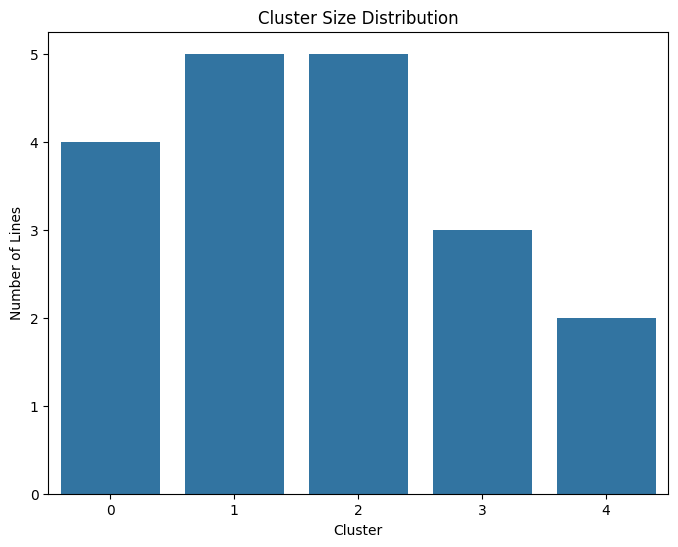

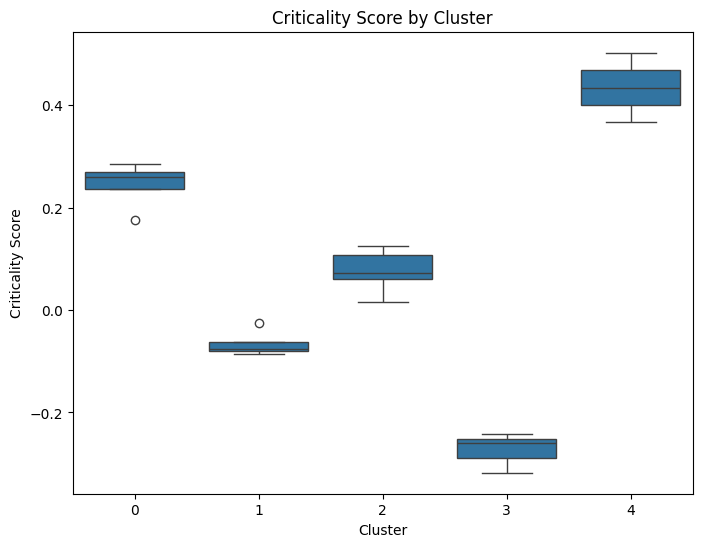

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster count plot
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=line_criticality)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Lines')
plt.show()

# Boxplot for criticality score by cluster
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='criticality_score', data=line_criticality)
plt.title('Criticality Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Criticality Score')
plt.show()

<Figure size 1200x1200 with 0 Axes>

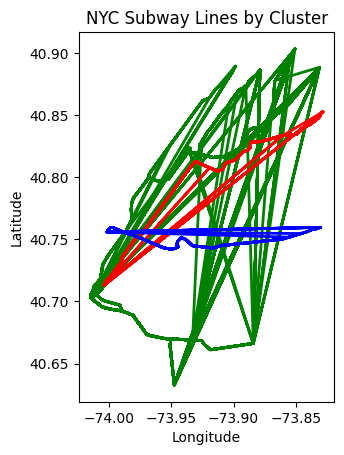

In [ ]:
#GTFS

import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt


# Load data
routes = pd.read_csv('/content/drive/MyDrive/AML_Proj/GTFS/routes.txt')  # Replace with the path to your `routes.txt`
shapes = pd.read_csv('/content/drive/MyDrive/AML_Proj/GTFS/shapes.txt')  # Replace with the path to your `shapes.txt`

# Clean and map cluster information
shapes['cleaned_shape_id'] = shapes['shape_id'].str.extract(r'(\d+)')
routes['cleaned_route_id'] = routes['route_id'].astype(str)

# Create geometries (LineStrings) grouped by shape_id
shapes['geometry'] = list(zip(shapes['shape_pt_lon'], shapes['shape_pt_lat']))
line_geometries = (
    shapes.groupby('cleaned_shape_id')['geometry']
    .apply(lambda x: LineString(x.tolist()))
    .reset_index()
)
line_geometries.rename(columns={'geometry': 'line_geometry'}, inplace=True)

# Merge with routes to attach route information to each line
route_shapes = pd.merge(
    line_geometries, routes,
    left_on='cleaned_shape_id', right_on='cleaned_route_id',
    how='inner'
)

# Assign clusters (update based on your mappings)
cluster_mapping = {
    '6': 4, '6X': 4, '7': 0, '7X': 0, 'A': 0, 'F': 0,
    '1': 3, '2': 3, '3': 3, '4': 3, '5': 3, '5X': 3,
    'B': 3, 'N': 3, 'C': 3, 'M': 3, 'G': 1, 'E': 2, 'L': 1
}
route_shapes['Cluster'] = route_shapes['route_short_name'].map(cluster_mapping)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(route_shapes, geometry=route_shapes['line_geometry'])

# Assign colors to clusters
color_map = {4: 'red', 0: 'blue', 3: 'green', 1: 'yellow', 2: 'purple'}
gdf['Color'] = gdf['Cluster'].map(color_map)

# Plot the map
plt.figure(figsize=(12, 12))
gdf.plot(color=gdf['Color'], linewidth=2, legend=True)
plt.title('NYC Subway Lines by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


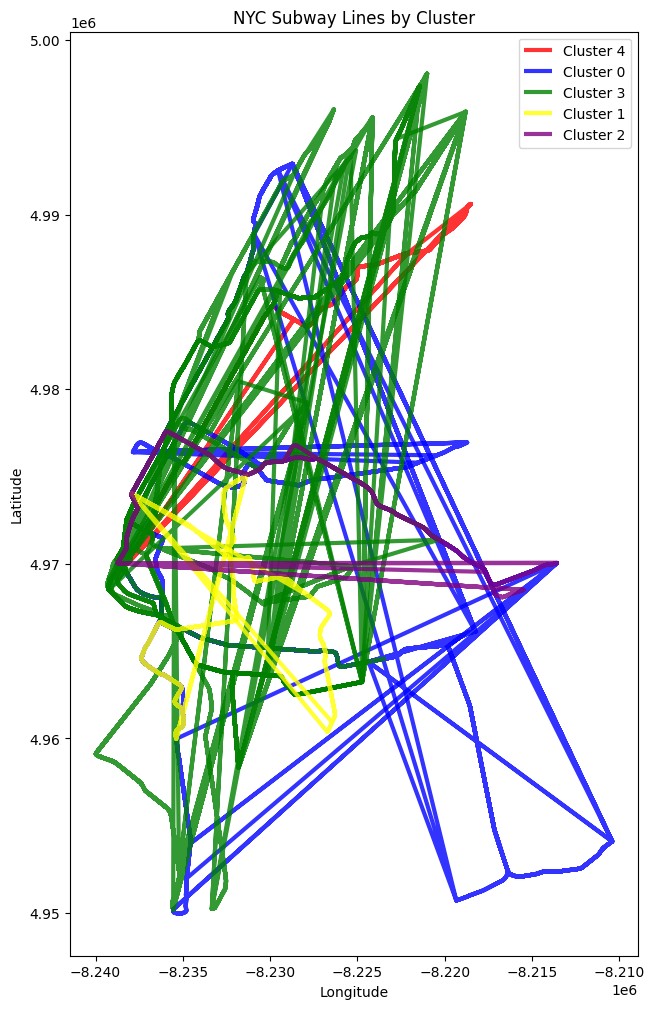

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Load GTFS data
routes = pd.read_csv('/content/drive/MyDrive/AML_Proj/GTFS/routes.txt')  # Replace with the path to your `routes.txt`
shapes = pd.read_csv('/content/drive/MyDrive/AML_Proj/GTFS/shapes.txt')  # Replace with the path to your `shapes.txt`

shapes['line'] = shapes['shape_id'].str.split('.', expand=True)[0]


# Map clusters to subway lines
cluster_mapping = {
    '6': 4, '6X': 4, '7': 0, '7X': 0, 'A': 0, 'F': 0,
    '1': 3, '2': 3, '3': 3, '4': 3, '5': 3, '5X': 3,
    'B': 3, 'N': 3, 'C': 3, 'M': 3, 'G': 1, 'E': 2, 'L': 1
}
routes['Cluster'] = routes['route_short_name'].map(cluster_mapping)

# Create geometries for shapes
shapes['geometry'] = list(zip(shapes['shape_pt_lon'], shapes['shape_pt_lat']))

line_geometries = (
    shapes.groupby('line')['geometry']
    .apply(lambda x: LineString(x.tolist()))
    .reset_index()
)
line_geometries.rename(columns={'geometry': 'line_geometry'}, inplace=True)

# Merge route and shape data
route_shapes = pd.merge(
    line_geometries, routes,
    left_on='line', right_on='route_id',
    how='inner'
)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(route_shapes, geometry=route_shapes['line_geometry'])

# Set CRS to WGS 84 (EPSG:4326) and reproject to a planar CRS (EPSG:3857)
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:3857")

# Define colors for clusters
color_map = {4: 'red', 0: 'blue', 3: 'green', 1: 'yellow', 2: 'purple'}
gdf['Color'] = gdf['Cluster'].map(color_map)

# Filter for valid clusters
gdf_filtered = gdf[gdf['Cluster'].notna()]

# Plot the subway lines with improved visualization
plt.figure(figsize=(12, 12))
ax = plt.gca()
for cluster, color in color_map.items():
    gdf_filtered[gdf_filtered['Cluster'] == cluster].plot(
        ax=ax, color=color, linewidth=3, alpha=0.8, label=f'Cluster {cluster}'
    )

# Adjust map boundaries for NYC (optional, for better visualization)
plt.title('NYC Subway Lines by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   line              16 non-null     object 
 1   line_geometry     16 non-null     object 
 2   agency_id         16 non-null     object 
 3   route_id          16 non-null     object 
 4   route_short_name  16 non-null     object 
 5   route_long_name   16 non-null     object 
 6   route_type        16 non-null     int64  
 7   route_desc        16 non-null     object 
 8   route_url         16 non-null     object 
 9   route_color       16 non-null     object 
 10  route_text_color  3 non-null      object 
 11  Cluster           16 non-null     float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ KB
Merged Route Shapes Info: None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column            Non-Null Co

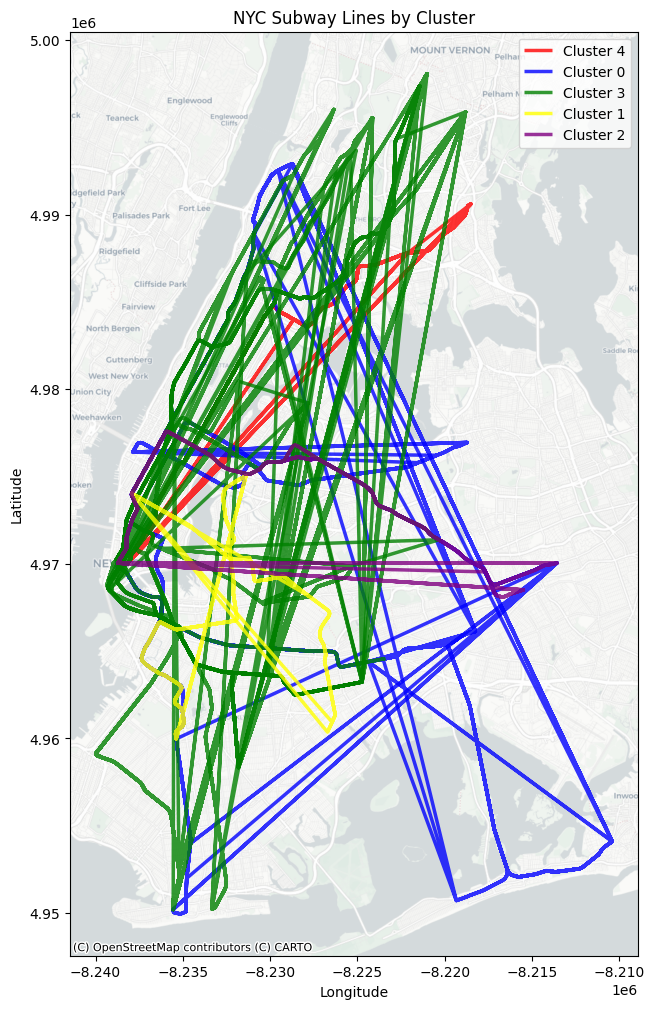

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import contextily as ctx

# Load GTFS data
routes = pd.read_csv('/content/drive/MyDrive/AML_Proj/GTFS/routes.txt')
shapes = pd.read_csv('/content/drive/MyDrive/AML_Proj/GTFS/shapes.txt')

# Split `shape_id` and use only the main part
shapes['line'] = shapes['shape_id'].str.split('.', expand=True)[0]

# Map clusters to subway lines
cluster_mapping = {
    '6': 4, '6X': 4, '7': 0, '7X': 0, 'A': 0, 'F': 0,
    '1': 3, '2': 3, '3': 3, '4': 3, '5': 3, '5X': 3,
    'B': 3, 'N': 3, 'C': 3, 'M': 3, 'G': 1, 'E': 2, 'L': 1
}
routes['Cluster'] = routes['route_short_name'].map(cluster_mapping)

# Filter and copy shapes to avoid SettingWithCopyWarning
shapes = shapes[shapes['line'].isin(cluster_mapping.keys())].copy()
shapes['geometry'] = list(zip(shapes['shape_pt_lon'], shapes['shape_pt_lat']))

# Group by `shape_id` to ensure proper route geometries
line_geometries = (
    shapes.groupby('line')['geometry']
    .apply(lambda x: LineString(x.tolist()))
    .reset_index()
)
line_geometries.rename(columns={'geometry': 'line_geometry'}, inplace=True)

# Merge route and shape data
route_shapes = pd.merge(
    line_geometries, routes,
    left_on='line', right_on='route_id',
    how='inner'
)

# Debug merge
print("Merged Route Shapes Info:", route_shapes.info())

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(route_shapes, geometry=route_shapes['line_geometry'])

# Set CRS to WGS 84 (EPSG:4326) and reproject to Web Mercator (EPSG:3857)
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:3857")

# Simplify geometries to reduce clutter
gdf['line_geometry'] = gdf['line_geometry'].apply(
    lambda geom: geom.simplify(tolerance=10, preserve_topology=True)
)

# Define colors for clusters
color_map = {4: 'red', 0: 'blue', 3: 'green', 1: 'yellow', 2: 'purple'}
gdf['Color'] = gdf['Cluster'].map(color_map)

# Filter for valid clusters
gdf_filtered = gdf[gdf['Cluster'].notna()]

# Debug filtered GeoDataFrame
print("Filtered GeoDataFrame Info:", gdf_filtered.info())

# Plot the subway lines with basemap
fig, ax = plt.subplots(figsize=(12, 12))
for cluster, color in color_map.items():
    gdf_filtered[gdf_filtered['Cluster'] == cluster].plot(
        ax=ax, color=color, linewidth=2.5, alpha=0.8, label=f'Cluster {cluster}'
    )

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=12)

# Add labels and legend
plt.title('NYC Subway Lines by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [ ]:
gdf_filtered.head()

,line,line_geometry,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_url,route_color,route_text_color,Cluster,geometry,Color
0,1,"LINESTRING (-74.013664 40.702068, -73.982464 4...",MTA NYCT,1,1,Broadway - 7 Avenue Local,1,Trains operate between 242 St in the Bronx and...,http://web.mta.info/nyct/service/pdf/t1cur.pdf,EE352E,NaN,3.0,"LINESTRING (-8239163.388 4968495.587, -8239288...",green
1,2,"LINESTRING (-73.947642 40.632836, -73.95098 40...",MTA NYCT,2,2,7 Avenue Express,1,"Trains operate between Wakefield-241 St, Bronx...",http://web.mta.info/nyct/service/pdf/t2cur.pdf,EE352E,NaN,3.0,"LINESTRING (-8231813.853 4958334.974, -8231899...",green
2,3,"LINESTRING (-73.884079 40.666235, -73.987495 4...",MTA NYCT,3,3,7 Avenue Express,1,"Trains operate between 148 St, 7 Av, Manhattan...",http://web.mta.info/nyct/service/pdf/t3cur.pdf,EE352E,NaN,3.0,"LINESTRING (-8224738.052 4963235.354, -8225329...",green
3,4,"LINESTRING (-73.884079 40.666235, -73.932942 4...",MTA NYCT,4,4,Lexington Avenue Express,1,Trains operate daily between Woodlawn/Jerome A...,http://web.mta.info/nyct/service/pdf/t4cur.pdf,00933C,NaN,3.0,"LINESTRING (-8224738.052 4963235.354, -8225329...",green
4,5,"LINESTRING (-73.873488 40.841894, -74.014065 4...",MTA NYCT,5,5,Lexington Avenue Express,1,"Weekdays daytime, most trains operate between ...",http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,NaN,3.0,"LINESTRING (-8223559.067 4989048.961, -8223370...",green


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import fiona
import shapely.wkt
import shapefile as shp
import plotly.express as px
from datetime import datetime
import calendar
from matplotlib_venn import venn2


import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from __future__ import division

import gtfs_functions as gtfs

ModuleNotFoundError: No module named 'fiona'

In [ ]:
import gtfs_functions as gtfs
gtfs_path = 'https://www.bart.gov/dev/schedules/google_transit.zip'

feed = Feed(gtfs_path, time_windows=[0, 6 , 9, 15, 19, 22, 24])

stop_freq = feed.stops_freq
routes = feed.routes
trips = feed.trips
stops = feed.stops
stop_times = feed.stop_times
shapes = feed.shapes
speeds = feed.avg_speeds

condition_dir = stop_freq.direction_id == 1
condition_window = ((stop_freq.window == '6:00-9:00') | (stop_freq.window == '9:00-15:00') | (stop_freq.window == '15:00-19:00'))
gdf = stop_freq.loc[(condition_dir & condition_window),:].reset_index()

gtfs.map_gdf(gdf = gdf,
              variable = 'ntrips',
              colors = ["#d13870", "#e895b3" ,'#55d992', '#3ab071', '#0e8955','#066a40'],
              tooltip_var = ['min_per_trip'] ,
              tooltip_labels = ['Frequency: '],
              breaks = [5, 20, 40, 60, 100, 200],
            )